In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import itertools
from scipy.special import kn
from scipy import optimize
from utils import *

In [2]:
# config = '24I/ml_0p01'
config = '24I/ml_0p005'
# config = '32I/ml0p008'
# config = '32I/ml0p006'
# config = '32I/ml0p004'
ainv_24I = [1.784, 0.005]
ainv_32I = [2.382, 0.008]
ainv_ensemble = gen_fake_ensemble(ainv_24I)
# ainv_ensemble = gen_fake_ensemble(ainv_32I)
# f3pt_path = '/Users/theoares/Dropbox (MIT)/research/0nubb/short_distance/analysis_output/'+config+'/3pt_output.h5'
f3pt_path = '/Users/theoares/Dropbox (MIT)/research/0nubb/short_distance/analysis_output/'+config+'/SD_output.h5'

In [3]:
f = h5py.File(f3pt_path, 'r')
L, T = f['L'][()], f['T'][()]
V = (L ** 3) * T
# C2pt_tavg = np.real(f['pion-00WW'][()])
C2_boot = np.real(f['pion-00WW'][()])
C2_pion00WP = np.real(f['pion-00WP'][()])
C2_fpWP = np.real(f['fp-00WP'][()])
C2_fpWW = np.real(f['fp-00WW'][()])
twopt_fns_boot = [C2_boot, C2_pion00WP, C2_fpWP, C2_fpWW]
labels = ['pion-00WW', 'pion-00WP', 'fp-00WP', 'fp-00WW']

<IPython.core.display.Javascript object>


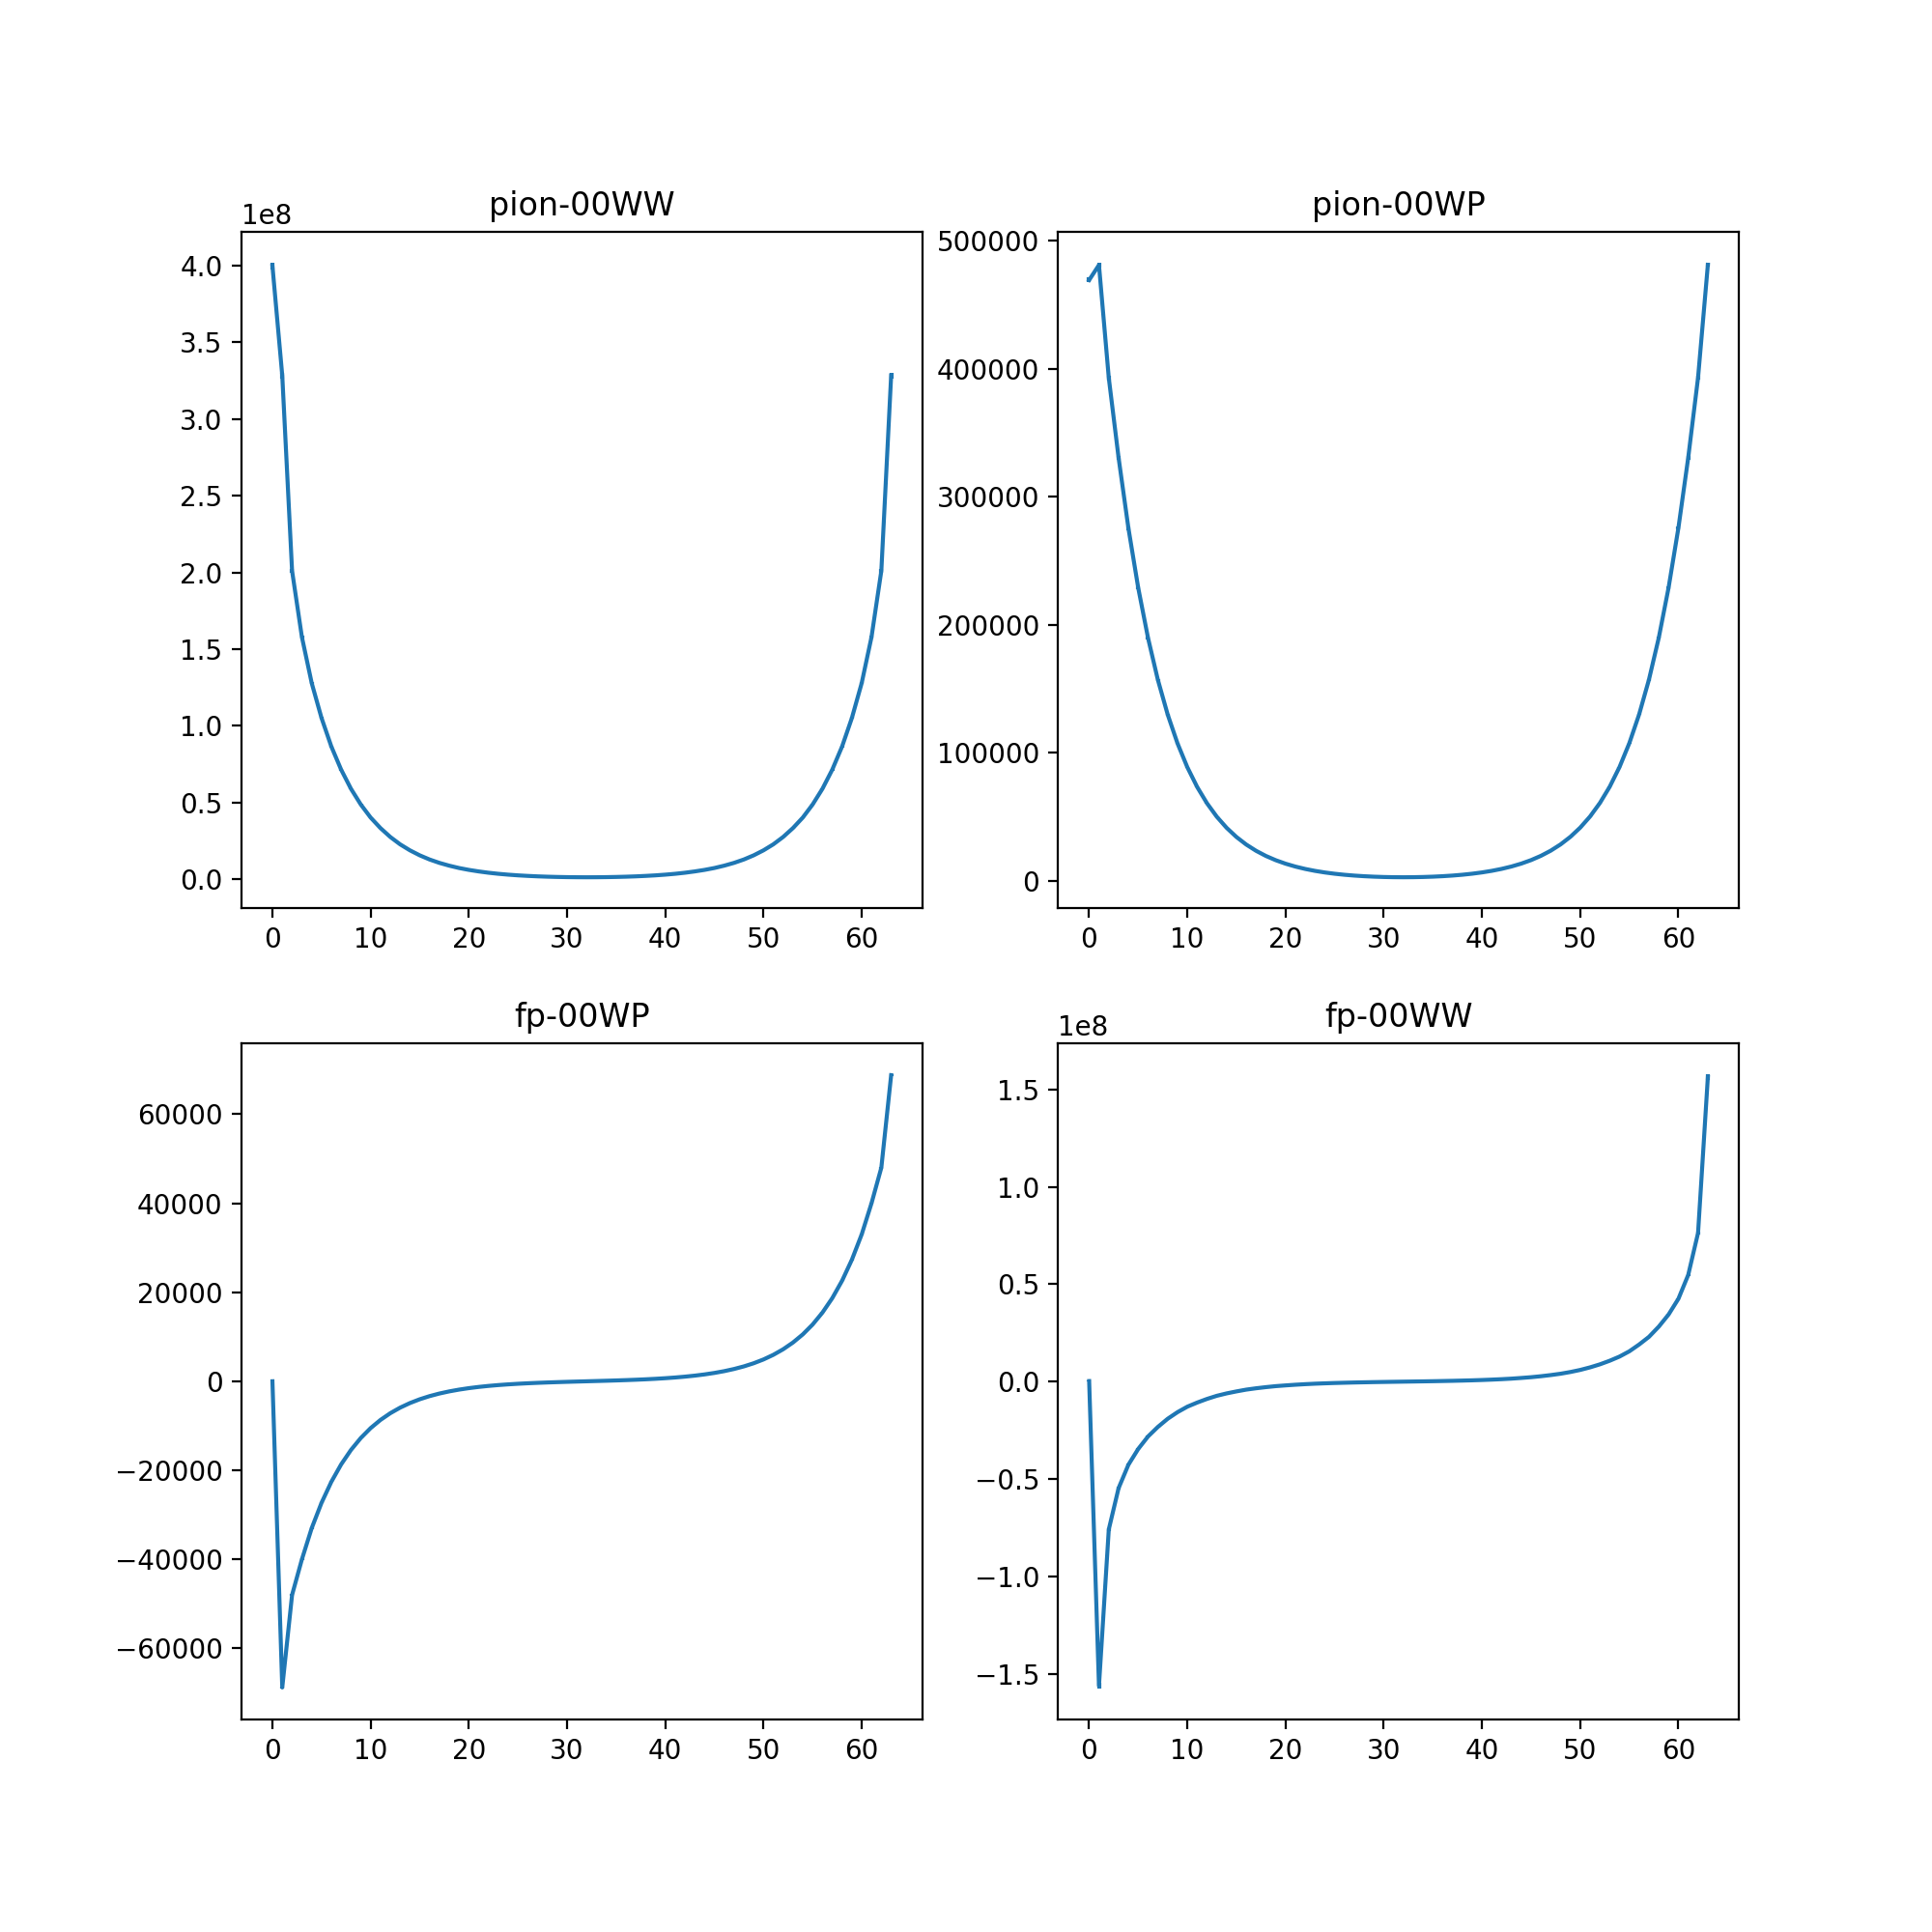

In [4]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
ax = ax.flatten()
for idx in range(len(twopt_fns_boot)):
    C2_i_mu = np.mean(twopt_fns_boot[idx], axis = 0)
    C2_i_sigma = np.std(twopt_fns_boot[idx], axis = 0, ddof = 1)
    ax[idx].errorbar(range(C2_i_mu.shape[0]), C2_i_mu, yerr = C2_i_sigma)
    ax[idx].set_title(labels[idx])

In [5]:
# fold over midpoint. For PP correlator fold sym and for AP correlator fold antisym.
C2_00WW_fold = fold(C2_boot, T)
C2_00WP_fold = fold(C2_pion00WP, T)
C2_fpWP_fold = fold(C2_fpWP, T, sym = False)
C2_fpWW_fold = fold(C2_fpWW, T, sym = False)
twopt_fns_folded = [C2_00WW_fold, C2_00WP_fold, C2_fpWP_fold, C2_fpWW_fold]

<IPython.core.display.Javascript object>


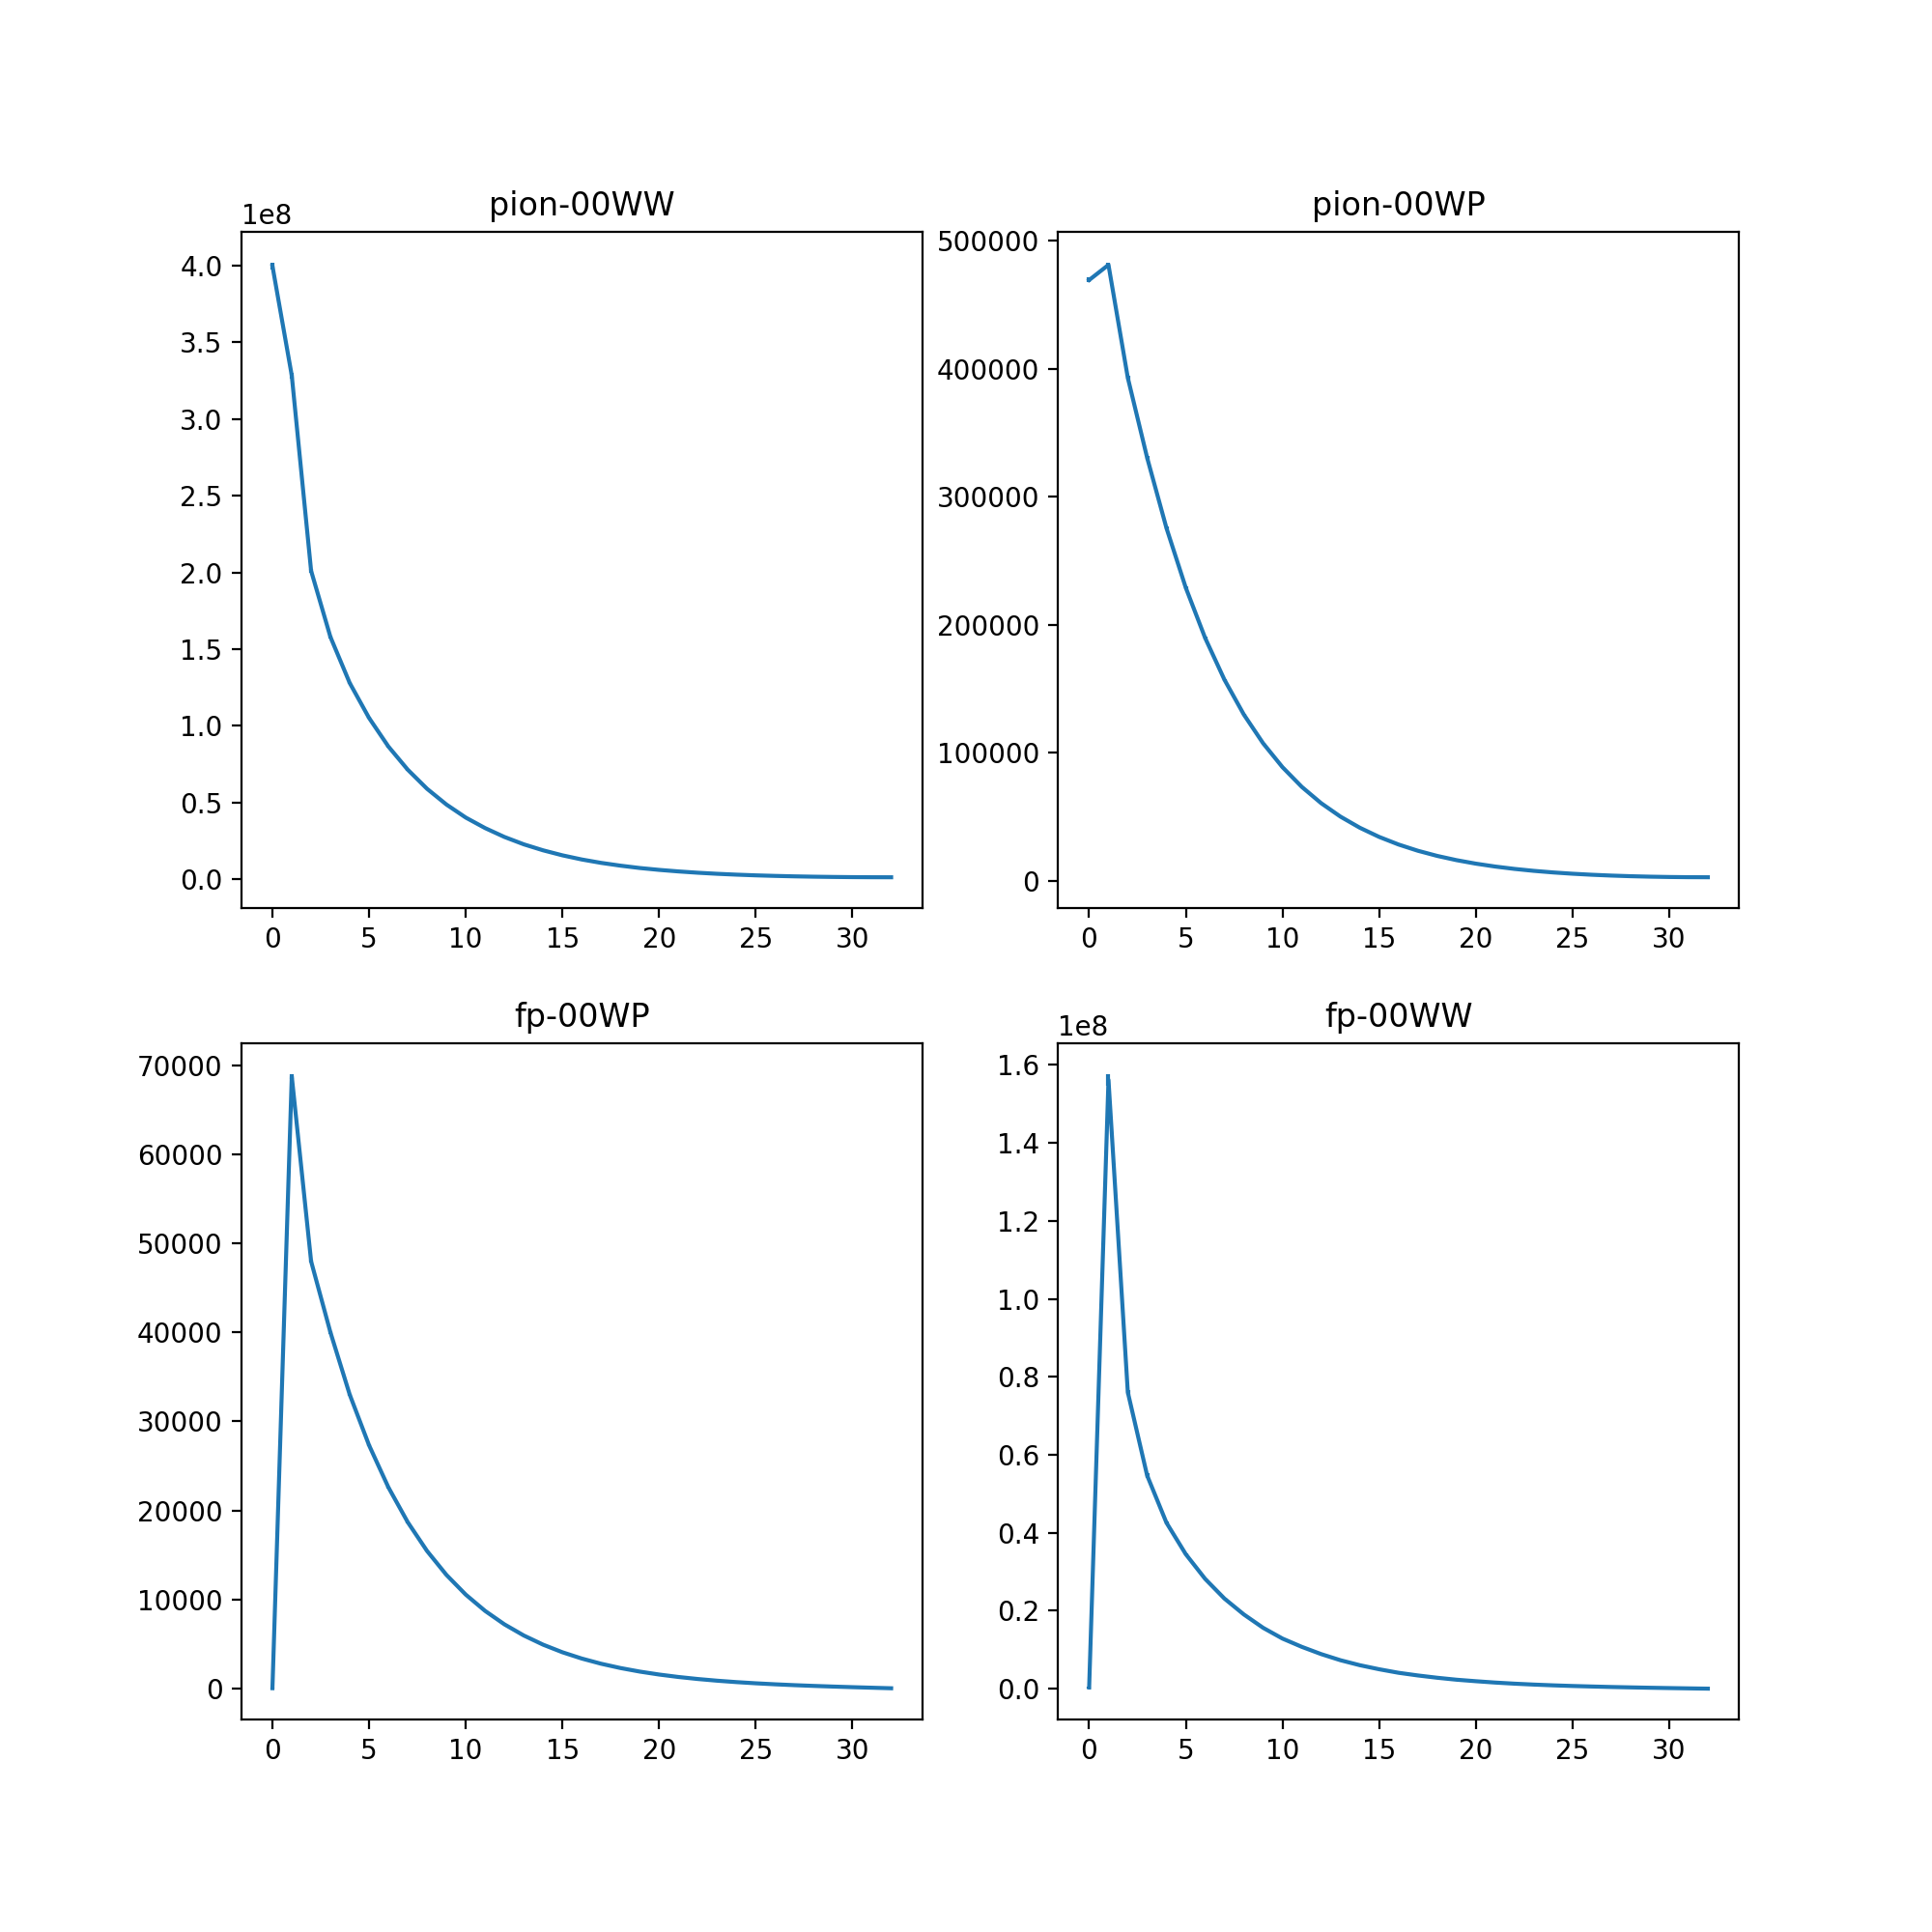

In [6]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
ax = ax.flatten()
for idx in range(len(twopt_fns_folded)):
    C2_i_mu = np.mean(twopt_fns_folded[idx], axis = 0)
    C2_i_sigma = np.std(twopt_fns_folded[idx], axis = 0, ddof = 1)
    ax[idx].errorbar(range(C2_i_mu.shape[0]), C2_i_mu, yerr = C2_i_sigma)
    ax[idx].set_title(labels[idx])

# Compute pion mass

#### pion-00WW

In [7]:
# I've already bootstrapped in the code
# C2_boot = np.real(C2pt_tavg)
# C2_boot_mu = np.mean(C2_boot, axis = 0)
# C2_boot_sigma = np.std(C2_boot, axis = 0, ddof = 1)

In [8]:
# meff_00WW = get_effective_mass(C2_00WW_fold)
# meff_00WW = get_cosh_effective_mass(C2_00WW_fold)
# meff_00WW_mu = np.mean(meff_00WW, axis = 0)
# meff_00WW_sigma = np.std(meff_00WW, axis = 0, ddof = 1)

# fold m_eff over midpoint for a better fit
meff_00WW = get_cosh_effective_mass(C2_boot)
meff_00WW_folded = fold_meff(meff_00WW, T)
meff_00WW_folded_mu = np.mean(meff_00WW_folded, axis = 0)
meff_00WW_folded_sigma = np.std(meff_00WW_folded, axis = 0, ddof = 1)

In [9]:
# meff_00WW_mu = np.mean(meff_00WW, axis = 0)
# meff_00WW_sigma = np.std(meff_00WW, axis = 0, ddof = 1)
# plt.figure()
# plt.errorbar(range(meff_00WW_mu.shape[0]), meff_00WW_mu, yerr = meff_00WW_sigma, fmt = '.', c = 'b')
# plt.show()

In [10]:
# perform fit over all ranges with fit_constant_allrange
fits_00WW, stats_00WW, meff_00WW, weights_00WW = fit_constant_allrange(meff_00WW_folded)

Accepted fits
fit index | fit range | p value | meff mean | meff sigma | weight 
78 range(3, 7) 0.1356961344898402 0.19364940723586466 0.0007502123272843332 241101.04022512108
79 range(3, 8) 0.14110628191736552 0.193277686784467 0.0007392607506654603 258196.9160427714
80 range(3, 9) 0.2041401628678109 0.19311442914599436 0.0007362410816573582 376606.97814372886
81 range(3, 10) 0.031402493403992135 0.192538360153498 0.0006956431812088038 64891.98634376622
82 range(3, 11) 0.04542822269350707 0.19235663879899426 0.0007092760294110577 90301.54494038
83 range(3, 12) 0.07275892753199364 0.19232867570752243 0.0007019345808135215 147670.25064044516
84 range(3, 13) 0.057737368453056166 0.19204712611030353 0.0006665714154904948 129946.20895441034
85 range(3, 14) 0.08596104474774796 0.1920141127634625 0.0006513184969421156 202635.1868480953
86 range(3, 15) 0.11671281521689768 0.19208573655515665 0.0006352758956319506 289197.004654797
87 range(3, 16) 0.12124752039014308 0.1918899663631852 0.000583

164 range(6, 27) 0.3955713406076817 0.19101099342787795 0.000585005544981046 1155858.9868923048
165 range(6, 28) 0.4535364349997918 0.191029310550309 0.0005899326377216477 1303188.7856647482
166 range(6, 29) 0.5082307842296807 0.19104981616533684 0.0005886658840078452 1466639.0127903302
167 range(6, 30) 0.4120382306250026 0.1911261438171112 0.0005715930177071863 1261141.1119746624
168 range(7, 11) 0.3572157041281167 0.1907749312277254 0.0009199742710126774 422064.8451827171
169 range(7, 12) 0.4602802875099148 0.19101942884304646 0.0008631825398238756 617756.1557522122
170 range(7, 13) 0.543535822540983 0.19078083987182157 0.0007529401151521415 958754.2452941411
171 range(7, 14) 0.6404827966867745 0.19091455380467084 0.0007549216425478533 1123838.0106522946
172 range(7, 15) 0.6102425385405553 0.19119038509210146 0.0007181681892160859 1183178.1725333338
173 range(7, 16) 0.6991909643550867 0.1910905203016702 0.0006430460981004574 1690875.3486493211
174 range(7, 17) 0.7319979699103376 0.19

260 range(12, 18) 0.40238945892972566 0.19134523266054515 0.0006805822180486046 868731.1607739703
261 range(12, 19) 0.20972788324903688 0.19092119858818107 0.0007123051329758283 413355.79039133125
262 range(12, 20) 0.1834295508257429 0.19066315568221728 0.0006366939522300908 452488.8200744733
263 range(12, 21) 0.18971780490588522 0.1908329029145574 0.0006357268174063079 469425.87776963646
264 range(12, 22) 0.21403564584362414 0.19098317336031911 0.00066338151316542 486361.7116976873
265 range(12, 23) 0.2650800455263122 0.19087232396933124 0.0006028213559619754 729457.136450852
266 range(12, 24) 0.2746343196050077 0.19100147290023275 0.0006182516549681259 718495.7980869788
267 range(12, 25) 0.2285478798222229 0.19081173348761318 0.0005991326252874716 636694.7341845836
268 range(12, 26) 0.19453625006979638 0.19096487245856783 0.0006176180986159635 509988.6513761387
269 range(12, 27) 0.25055839613316255 0.1909607281199152 0.0005767998293120053 753110.5196855644
270 range(12, 28) 0.3081002

344 range(19, 25) 0.23898369792298738 0.19067827104899393 0.0006944809359689403 495504.51930480887
345 range(19, 26) 0.19196066369361958 0.19101138397130982 0.0007334125197347032 356874.5715310313
346 range(19, 27) 0.2756344227563161 0.1909958051296614 0.0006031987611195511 757552.2142890785
347 range(19, 28) 0.36352807773828255 0.19104000559164114 0.0006191317922878091 948356.7702972313
348 range(19, 29) 0.4502919877423267 0.19108543679416015 0.0006182119685663987 1178201.0405350102
349 range(19, 30) 0.3264932626962879 0.19125203547937816 0.0005830293467868908 960491.205780279
350 range(20, 24) 0.5391955622892834 0.1916875294157998 0.000804025411420983 834078.1787749962
351 range(20, 25) 0.28963514304441595 0.19104848314728823 0.0006657293955972261 653515.3432027638
352 range(20, 26) 0.2718950724295108 0.1913760436302676 0.0007117017060832058 536791.1203583858
353 range(20, 27) 0.3741412146985381 0.19129068428896961 0.0006020524129290649 1032207.3549018633
354 range(20, 28) 0.48671555

In [11]:
ampi_pion00WW_bar, ampi_pion00WW_sigma = analyze_accepted_fits(meff_00WW, weights_00WW)
print('meff on pion-00WW, avg over all fit ranges with cut ϵ = 0.01 on pvals: ' + str(ampi_pion00WW_bar) \
      + ' \pm ' + str(ampi_pion00WW_sigma))

meff on pion-00WW, avg over all fit ranges with cut ϵ = 0.01 on pvals: 0.19113466960526 \pm 0.0007193493400035919


<IPython.core.display.Javascript object>


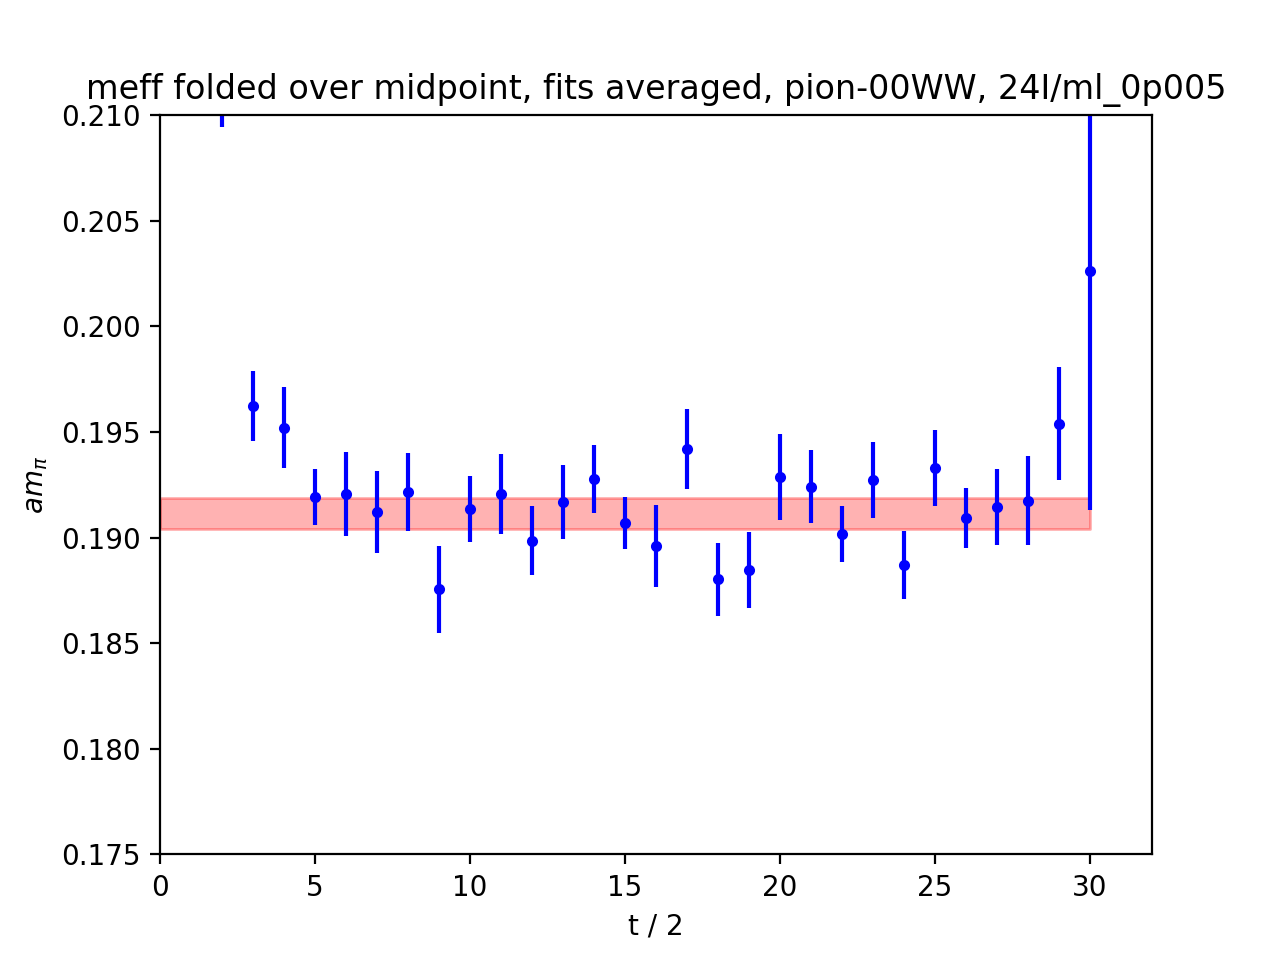

In [12]:
t_range = range(meff_00WW_folded_mu.shape[0])
plt.figure()
plt.errorbar(t_range, meff_00WW_folded_mu, yerr = meff_00WW_folded_sigma, fmt = '.', c = 'b')
plt.fill_between(t_range, ampi_pion00WW_bar - ampi_pion00WW_sigma, ampi_pion00WW_bar + ampi_pion00WW_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
plt.ylim((0.175, 0.21))
plt.title('meff folded over midpoint, fits averaged, pion-00WW, ' + config)
plt.xlabel('t / 2')
plt.ylabel('$a m_{\\pi}$')
plt.show()

#### pion-00WP

In [13]:
# get effective mass for pion-00WP
meff_00WP = get_cosh_effective_mass(C2_pion00WP)
meff_00WP_folded = fold_meff(meff_00WP, T)

meff_00WP_folded_mu = np.mean(meff_00WP_folded, axis = 0)
meff_00WP_folded_sigma = np.std(meff_00WP_folded, axis = 0, ddof = 1)

In [14]:
fits_00WP, stats_00WP, meff_00WP, weights_00WP = fit_constant_allrange(meff_00WP_folded)

Accepted fits
fit index | fit range | p value | meff mean | meff sigma | weight 
125 range(5, 9) 0.10670854452683336 0.190010099961059 0.0005556676831658755 345596.16704855295
126 range(5, 10) 0.08462973627248457 0.19017915322458293 0.000561226852422271 268686.65915236395
127 range(5, 11) 0.09089492626150578 0.19028749871393136 0.0005677882085677325 281946.6269782832
128 range(5, 12) 0.09868939850480708 0.19037959347889605 0.0005706789218752754 303030.8456740468
129 range(5, 13) 0.12375577736279403 0.19044312972216584 0.0005691125418883496 382093.0774340192
130 range(5, 14) 0.15318432431920842 0.1904982521897529 0.0005623429562932323 484408.55656960286
131 range(5, 15) 0.18692246407144922 0.1905431345692381 0.0005578887792765817 600573.6091405122
132 range(5, 16) 0.23595132760555493 0.1905726622946898 0.0005557393490826098 763976.7275083243
133 range(5, 17) 0.2968463374656187 0.19059310523427977 0.0005550265312294811 963616.4551766762
134 range(5, 18) 0.36793464067151127 0.190605858763

215 range(9, 21) 0.9999995283871496 0.19091859912650622 0.0005854014403279986 2918046.591808304
216 range(9, 22) 0.9999995915027071 0.19093454464796777 0.0005883567709558541 2888805.558162616
217 range(9, 23) 0.9999993114903467 0.19095355193980473 0.0005915710513748403 2857497.5969105023
218 range(9, 24) 0.9999984145017723 0.19097579982244045 0.0005933678953720571 2840215.03361275
219 range(9, 25) 0.9999992077854492 0.19098823151850738 0.0005944377953560544 2830002.546651324
220 range(9, 26) 0.9999997232764694 0.19099627661022758 0.0005938861796701434 2835263.597771479
221 range(9, 27) 0.9999998994243692 0.19100445109131914 0.000593618581144352 2837820.9022823516
222 range(9, 28) 0.9999997787273017 0.19102476012900366 0.0005942352625474922 2831933.5880316775
223 range(9, 29) 0.999985554966662 0.1910619875545562 0.0005956999638514457 2817984.3642176436
224 range(9, 30) 0.9979884477612613 0.19111221497025624 0.0005971474198202136 2798738.962712211
225 range(10, 14) 0.999159841754156 0.19

306 range(15, 25) 0.9990241463904588 0.19099792731509557 0.0006284798455284767 2529258.8319427357
307 range(15, 26) 0.9996320237526184 0.1910100133320285 0.0006262728766689119 2548666.168925025
308 range(15, 27) 0.9998614728198478 0.19102163131588273 0.0006241737862889664 2566426.2184067643
309 range(15, 28) 0.9998424382424903 0.19105126205251416 0.0006235769372180391 2571292.4655615063
310 range(15, 29) 0.9982510861839807 0.19110497521019063 0.0006247711616065055 2557395.17443815
311 range(15, 30) 0.9648441565396995 0.1911762763852882 0.0006264205821072176 2458810.921032562
312 range(16, 20) 0.9838448290289666 0.19080852304737633 0.00061332536680845 2615439.9482653593
313 range(16, 21) 0.990798651390776 0.19085478751761273 0.0006188790333377643 2586865.610191298
314 range(16, 22) 0.993345817218009 0.19089900820050978 0.0006267325634551624 2528924.984805029
315 range(16, 23) 0.9941776095115531 0.19094275871598027 0.0006336361837774141 2476190.417286597
316 range(16, 24) 0.9943379571610

In [15]:
ampi_pion00WP_bar, ampi_pion00WP_sigma = analyze_accepted_fits(meff_00WP, weights_00WP)
print('meff on pion-00WW, avg over all fit ranges with cut ϵ = 0.01 on pvals: ' + str(ampi_pion00WP_bar) \
      + ' \pm ' + str(ampi_pion00WP_sigma))

meff on pion-00WW, avg over all fit ranges with cut ϵ = 0.01 on pvals: 0.19098270481617913 \pm 0.0006320679646443838


<IPython.core.display.Javascript object>


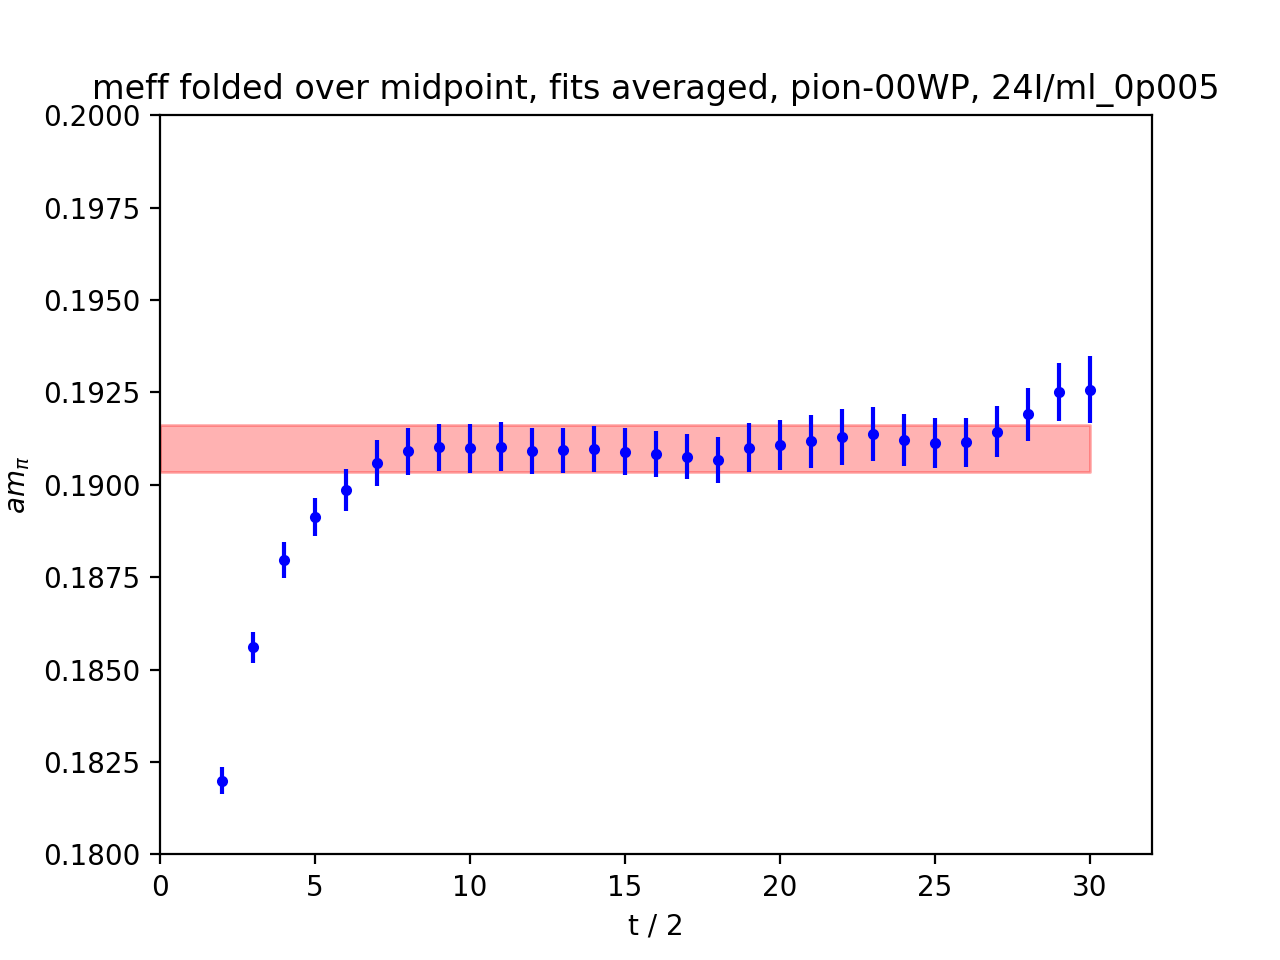

In [16]:
plt.figure()
plt.errorbar(t_range, meff_00WP_folded_mu, yerr = meff_00WP_folded_sigma, fmt = '.', c = 'b')
plt.fill_between(t_range, ampi_pion00WP_bar - ampi_pion00WP_sigma, ampi_pion00WP_bar + ampi_pion00WP_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
plt.ylim((0.18, 0.2))
plt.title('meff folded over midpoint, fits averaged, pion-00WP, ' + config)
plt.xlabel('t / 2')
plt.ylabel('$a m_{\\pi}$')
plt.show()

#### fp-00WP

In [17]:
meff_fpWP = get_sinh_effective_mass(C2_fpWP)
# meff_fpWP = get_effective_mass(C2_fpWP)
meff_fpWP_folded = fold_meff(meff_fpWP, T)

meff_fpWP_folded_mu = np.mean(meff_fpWP_folded, axis = 0)
meff_fpWP_folded_sigma = np.std(meff_fpWP_folded, axis = 0, ddof = 1)

/Users/theoares/lqcd/0nubb/python_scripts/utils.py:605: RuntimeWarning: overflow encountered in sinh
  m = optimize.root(lambda m : ratios[ens_idx, t] - np.sinh(m * (t - TT / 2)) / np.sinh(m * (t + 1 - TT / 2)), \
/Users/theoares/lqcd/0nubb/python_scripts/utils.py:605: RuntimeWarning: invalid value encountered in true_divide
  m = optimize.root(lambda m : ratios[ens_idx, t] - np.sinh(m * (t - TT / 2)) / np.sinh(m * (t + 1 - TT / 2)), \
/Users/theoares/lqcd/0nubb/python_scripts/utils.py:605: RuntimeWarning: divide by zero encountered in true_divide
  m = optimize.root(lambda m : ratios[ens_idx, t] - np.sinh(m * (t - TT / 2)) / np.sinh(m * (t + 1 - TT / 2)), \


In [18]:
fits_fpWP, stats_fpWP, meff_fpWP, weights_fpWP = fit_constant_allrange(meff_fpWP_folded)

Accepted fits
fit index | fit range | p value | meff mean | meff sigma | weight 
63 range(2, 16) 0.013617362111388998 0.19088897360031115 0.0005561723908676187 44022.44242194511
64 range(2, 17) 0.020706398930499602 0.1908970655097038 0.0005564528617932417 66872.53955478204
65 range(2, 18) 0.030624585268499982 0.19090146707452788 0.0005596184107726055 97788.14962542726
66 range(2, 19) 0.04081144177822819 0.1909188743737502 0.0005605113374051662 129901.19156467279
67 range(2, 20) 0.04794797114990244 0.19094475882428041 0.000561843120635173 151893.8185120118
68 range(2, 21) 0.06450567422292323 0.19095288053933462 0.0005648351844359267 202187.5619489588
69 range(2, 22) 0.08196588574293764 0.19096488004296383 0.0005685266405643011 253589.63357383132
70 range(2, 23) 0.10517688111593346 0.19097260747757222 0.0005724180414413862 320991.59552104643
71 range(2, 24) 0.12931919672555764 0.1909841085295322 0.0005740068358359371 392490.2470117373
72 range(2, 25) 0.16265729539915544 0.190986686870659

149 range(6, 12) 0.9952028268315143 0.19094007176035738 0.0005921934988107607 2837816.6357511114
150 range(6, 13) 0.9985709028092128 0.19092416744796167 0.0005880392022206894 2887794.9170316895
151 range(6, 14) 0.9993847815137736 0.190946581286819 0.0005891890091561124 2878879.307304312
152 range(6, 15) 0.9998329701457739 0.1909543334897042 0.0005941881308726125 2831910.404329505
153 range(6, 16) 0.9999601070890045 0.19095132535608828 0.0005900722377213748 2871919.816688121
154 range(6, 17) 0.9999900795048987 0.1909576505695388 0.0005887066589249153 2885345.306252262
155 range(6, 18) 0.999997797088307 0.19096004212730977 0.0005920629029992312 2852747.561203019
156 range(6, 19) 0.9999973456193731 0.19098075785308632 0.0005919914408533409 2853435.0524040787
157 range(6, 20) 0.9999834017796029 0.19101281835308317 0.0005929058962507833 2844600.3089113086
158 range(6, 21) 0.9999939122540545 0.19102059791665874 0.0005958352844983809 2816728.060372043
159 range(6, 22) 0.9999961901281825 0.191

239 range(10, 28) 0.9993479090950641 0.19119367401860818 0.0006219551460679145 2583441.174877454
240 range(10, 29) 0.9961259002902026 0.19121766166867538 0.0006229503848020168 2566890.3393195686
241 range(10, 30) 0.9804425329004265 0.19120890652130382 0.0006242487607373065 2515977.572872293
242 range(11, 15) 0.987251211204931 0.19101008385685764 0.0006289450616116112 2495756.738157198
243 range(11, 16) 0.9972842903657837 0.19099121037789352 0.0006167137067703285 2622115.2480092314
244 range(11, 17) 0.9995383528801294 0.19099633745481143 0.0006128957598200021 2660885.759791373
245 range(11, 18) 0.9999294417777765 0.1909960393411201 0.0006188445306734906 2610996.212528464
246 range(11, 19) 0.9999033032186075 0.19102717908429337 0.0006184437103236644 2614313.4005169626
247 range(11, 20) 0.9994879198303348 0.19107457521071672 0.000618896299551632 2609406.7256815187
248 range(11, 21) 0.9998472953211436 0.1910820246372652 0.0006226284444279415 2579145.0154595007
249 range(11, 22) 0.999928230

329 range(17, 27) 0.9999204132435658 0.1912534585353934 0.0006906911499322629 2096030.76097219
330 range(17, 28) 0.986565060581353 0.19135640993280545 0.0006642359752461924 2236047.0826005163
331 range(17, 29) 0.9595188427805478 0.19139682720914752 0.0006651554235056041 2168738.726516856
332 range(17, 30) 0.8600098744650747 0.19138036938463224 0.0006667587778464723 1934487.6168068303
333 range(18, 22) 0.9911121246730098 0.1913138468972274 0.0006836476533434915 2120596.958945577
334 range(18, 23) 0.9982791849966082 0.19129702445406682 0.0006918890574008048 2085350.6498126427
335 range(18, 24) 0.9997468655213643 0.19129831625968088 0.0006890681251903332 2105550.8266568836
336 range(18, 25) 0.9997588487131108 0.19125993405683364 0.0006801879445807664 2160913.56589678
337 range(18, 26) 0.9999533183023361 0.19125279093356806 0.0006831167949017252 2142840.2736200863
338 range(18, 27) 0.9998954623592572 0.1912848615196345 0.0006928346002026068 2083029.6943484347
339 range(18, 28) 0.9820759172

In [19]:
ampi_fpWP_bar, ampi_fpWP_sigma = analyze_accepted_fits(meff_fpWP, weights_fpWP)
print('meff on fp-00WP, avg over all fit ranges with cut ϵ = 0.01 on pvals: ' + str(ampi_fpWP_bar) \
      + ' \pm ' + str(ampi_fpWP_sigma))

meff on fp-00WP, avg over all fit ranges with cut ϵ = 0.01 on pvals: 0.19106737154327735 \pm 0.0006502665396351967


<IPython.core.display.Javascript object>


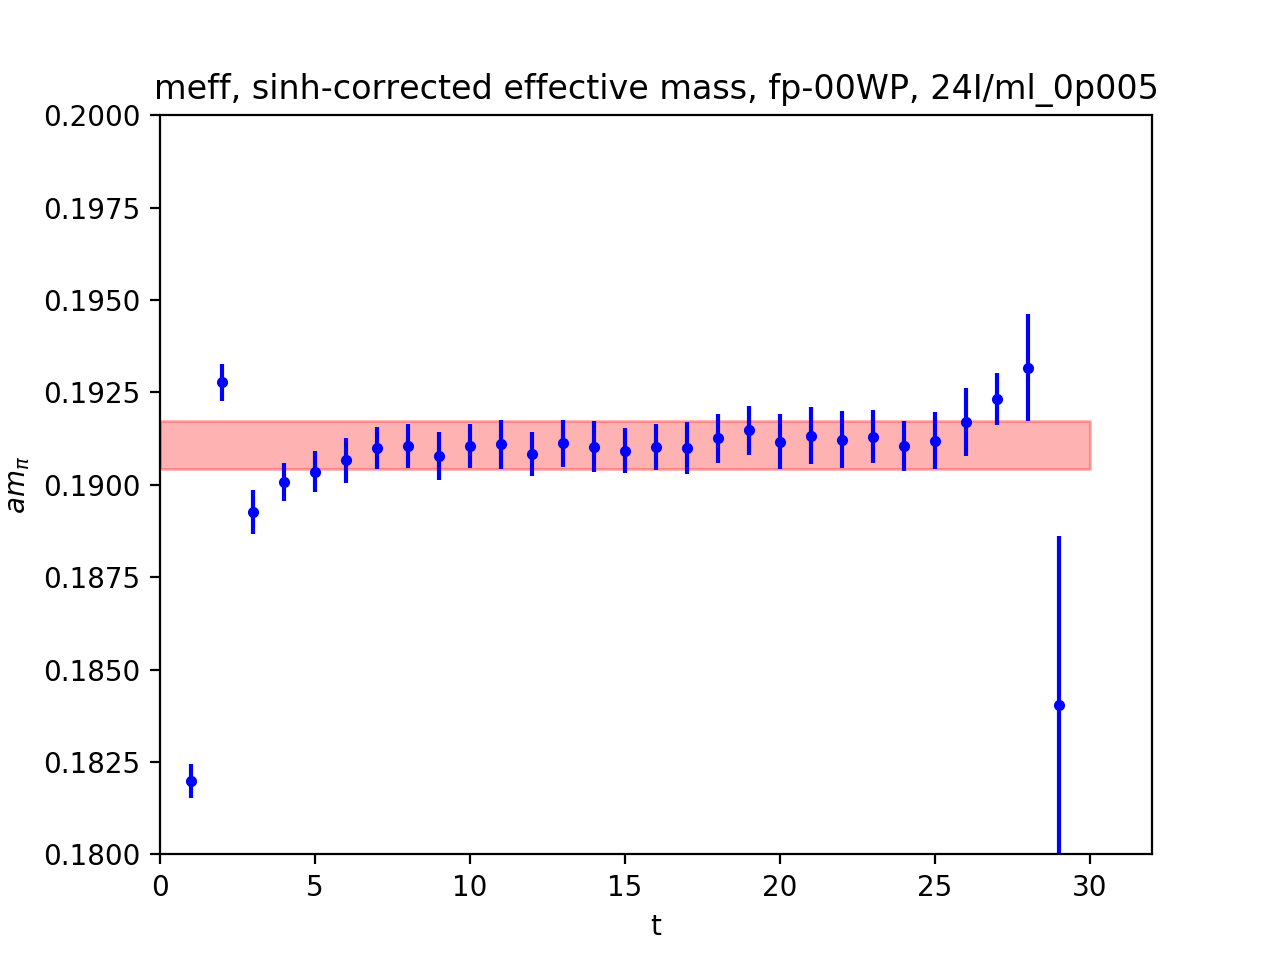

In [20]:
plt.figure()
plt.errorbar(range(meff_00WP_folded.shape[1]), meff_fpWP_folded_mu, yerr = meff_fpWP_folded_sigma, fmt = '.', c = 'b')
plt.fill_between(t_range, ampi_fpWP_bar - ampi_fpWP_sigma, ampi_fpWP_bar + ampi_fpWP_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
plt.ylim((0.18, 0.20))
plt.title('meff, sinh-corrected effective mass, fp-00WP, ' + config)
plt.xlabel('t')
plt.ylabel('$a m_{\\pi}$')
plt.show()

#### fp-00WW

In [21]:
# get effective mass for pion-00WP
# meff_fpWW = get_cosh_effective_mass(C2_fpWW)
meff_fpWW = get_sinh_effective_mass(C2_fpWW)
meff_fpWW_folded = fold_meff(meff_fpWW, T)

meff_fpWW_folded_mu = np.mean(meff_fpWW_folded, axis = 0)
meff_fpWW_folded_sigma = np.std(meff_fpWW_folded, axis = 0, ddof = 1)

In [22]:
fits_fpWW, stats_fpWW, meff_fpWW, weights_fpWW = fit_constant_allrange(meff_fpWW_folded)

Accepted fits
fit index | fit range | p value | meff mean | meff sigma | weight 
78 range(3, 7) 0.02211973207906698 0.2014498963104794 0.0014173347889550336 11011.208039841365
79 range(3, 8) 0.043498029384757116 0.2010832972154807 0.0013977795756249863 22263.436528404625
80 range(3, 9) 0.03503870602560059 0.200018435492459 0.0012529166257718757 22320.489513198856
102 range(4, 8) 0.5882815207329413 0.198220596716926 0.0016087880468774946 227293.77661059
103 range(4, 9) 0.623325382481907 0.19744837229869228 0.0013024804592203195 367428.1104495363
106 range(4, 12) 0.014270636395629787 0.19400755206941267 0.0010081197192194594 14041.681605789225
107 range(4, 13) 0.02278876394941332 0.19373772900697628 0.0010213687092632414 21845.182267038814
108 range(4, 14) 0.023197603972302146 0.19305554136709746 0.0008607470142255751 31310.649754830585
109 range(4, 15) 0.015367764725676102 0.19378413120667795 0.0008091301843641077 23473.286397440068
125 range(5, 9) 0.711714289423084 0.19657926955392394 

243 range(11, 16) 0.033017688297394446 0.19161653991650365 0.001231736285167891 21762.620692535005
244 range(11, 17) 0.05908258325694006 0.19133430465265966 0.001295882762237485 35182.60964092396
245 range(11, 18) 0.07472325310438581 0.1917551419941912 0.0010734762829864859 64844.15919897054
246 range(11, 19) 0.019434731464104685 0.1908834066821139 0.001114352228121121 15650.69300625267
247 range(11, 20) 0.02325786745751369 0.19125987424388596 0.0009396338985400378 26342.23009640507
248 range(11, 21) 0.035524444813697105 0.1914229131186774 0.0009333442639518532 40779.657491307305
249 range(11, 22) 0.055281948433744614 0.19146381074752095 0.0009596318370369025 60030.788230954866
250 range(11, 23) 0.07903884039902713 0.1913808757212555 0.0009114972512485256 95132.70230639246
251 range(11, 24) 0.11108587936462211 0.19142473886724795 0.0008462535041127827 155116.4644252505
252 range(11, 25) 0.037696308751724764 0.1909335859052439 0.0008860146218140873 48019.43521352436
253 range(11, 26) 0.

335 range(18, 24) 0.2598576051416352 0.19067218951592577 0.001466383152412375 120848.28932147221
336 range(18, 25) 0.09177063019673282 0.18924371469470586 0.0013385907726930339 51216.28342473112
337 range(18, 26) 0.040501127436648715 0.19016299771196526 0.0012201135801545478 27206.118853956163
338 range(18, 27) 0.056306004889665175 0.18999531350015134 0.0011950508972372628 39425.926608049915
339 range(18, 28) 0.03785452390568515 0.19044116934712474 0.0011850324939544903 26956.113136308202
340 range(18, 29) 0.045132129155955644 0.19034088384693418 0.0012077489673005628 30940.866551260176
341 range(18, 30) 0.06793869657847317 0.19034149409881784 0.0012044395795657345 46832.481837492975
342 range(19, 23) 0.8338934962831664 0.19303776666276154 0.0016012823618105734 325218.12894137145
343 range(19, 24) 0.9294721802529589 0.19301800220264945 0.001428332533003229 455593.73063575395
344 range(19, 25) 0.24864848310419257 0.1910643862275315 0.0012501879634534167 159087.18146786786
345 range(19, 

In [23]:
ampi_pionfpWW_bar, ampi_pionfpWW_sigma = analyze_accepted_fits(meff_fpWW, weights_fpWW)
print('meff on fp-00WW, avg over all fit ranges with cut ϵ = 0.01 on pvals: ' + str(ampi_pionfpWW_bar) \
      + ' \pm ' + str(ampi_pionfpWW_sigma))

meff on fp-00WW, avg over all fit ranges with cut ϵ = 0.01 on pvals: 0.191703213134871 \pm 0.002338016761899432


<IPython.core.display.Javascript object>


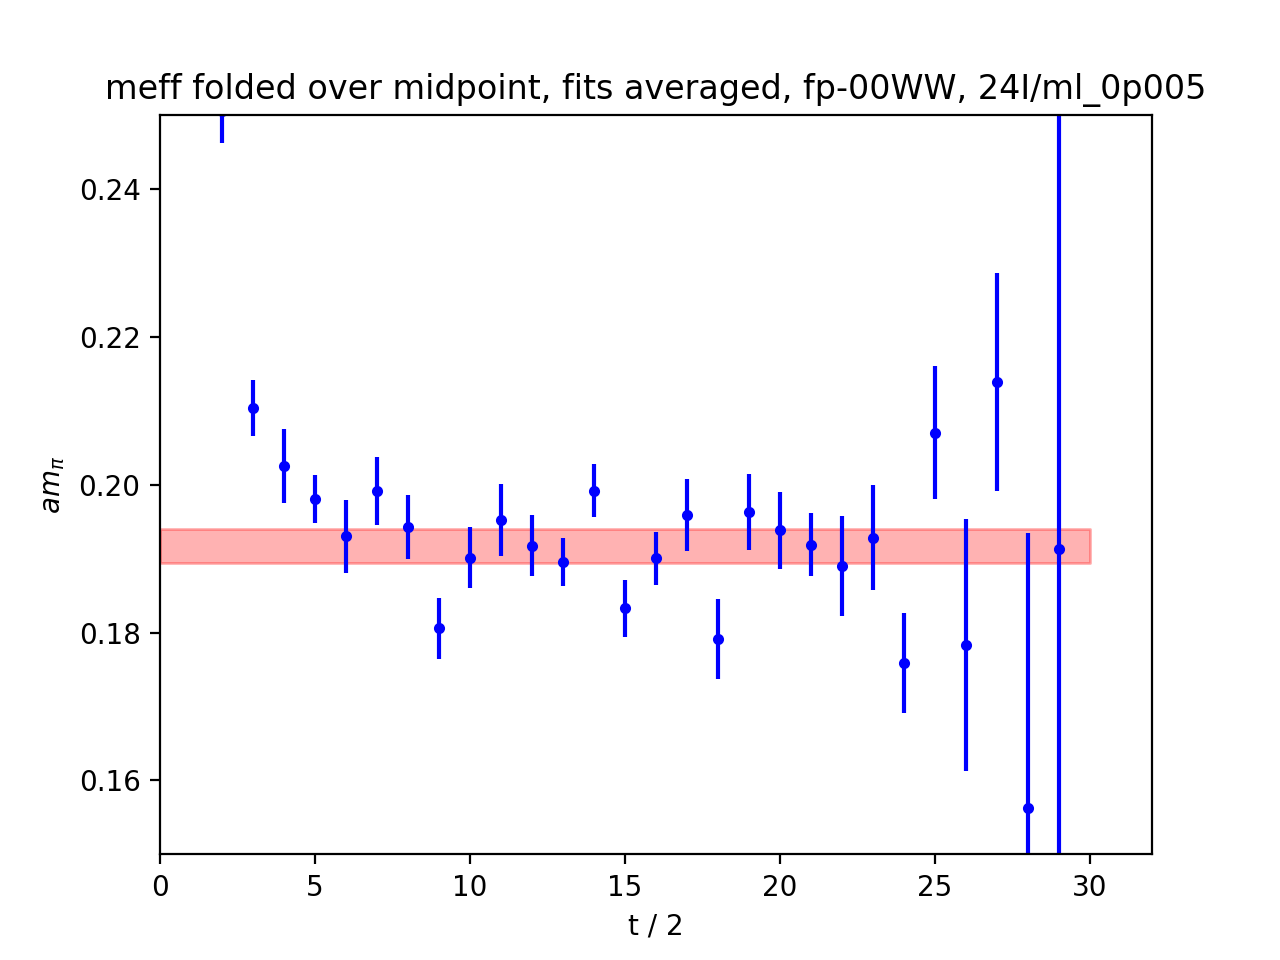

In [24]:
plt.figure()
plt.errorbar(t_range, meff_fpWW_folded_mu, yerr = meff_fpWW_folded_sigma, fmt = '.', c = 'b')
plt.fill_between(t_range, ampi_pionfpWW_bar - ampi_pionfpWW_sigma, ampi_pionfpWW_bar + ampi_pionfpWW_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
plt.ylim((0.15, 0.25))
plt.title('meff folded over midpoint, fits averaged, fp-00WW, ' + config)
plt.xlabel('t / 2')
plt.ylabel('$a m_{\\pi}$')
plt.show()

#### Simultaneous fit for pion-00WP, pion-00WW, fp-00WP

In [25]:
meff_all = np.concatenate((meff_00WW, meff_00WP, meff_fpWP, meff_fpWW), axis = 0)
weights_all = np.concatenate((weights_00WW, weights_00WP, weights_fpWP, weights_fpWW), axis = 0)
meff_mu_all, meff_sigma_all = analyze_accepted_fits(meff_all, weights_all)

In [26]:
print('Average over all fits for all stems: ampi = ' + str(meff_mu_all) + ' \pm ' + str(meff_sigma_all))

Average over all fits for all stems: ampi = 0.19104891946660327 \pm 0.0006882955802606984


In [27]:
# average over boostraps to see if the error is similar
meff_boots = weighted_sum_bootstrap(meff_all, weights_all)
meff_boots_mu = np.mean(meff_boots)
meff_boots_sigma = np.std(meff_boots, ddof = 1)

In [28]:
print('Average over bootstrapped samples: ' + str(meff_boots_mu) + ' \pm ' + str(meff_boots_sigma))

Average over bootstrapped samples: 0.19104891946660324 \pm 0.0005914961967507855


# Compute ratio of renormalization coefficients

In [29]:
# read in bootstrapped, t-averaged curly A and A data and construct ratio. C2_A[t] is evaluated at t - 1/2
C2_curlyA = np.real(f['za_curlyA'][()])
C2_A = np.real(f['za_A'][()])
# C2_A = np.real(f['za_curlyA'][()])
# C2_curlyA = np.real(f['za_A'][()])
Zratio_boot = (C2_curlyA + np.roll(C2_curlyA, +1, axis = 1))/(4.0*C2_A)+C2_curlyA/(C2_A + np.roll(C2_A, -1, axis = 1))
Zratio_boot_mu = np.mean(Zratio_boot, axis = 0)
Zratio_boot_sigma = np.std(Zratio_boot, axis = 0, ddof = 1)

In [30]:
Z_fits, Z_stats, Z_ens, Z_weights = fit_constant_allrange(Zratio_boot)
Zratio_mu, Zratio_sigma = analyze_accepted_fits(Z_ens, Z_weights)

Accepted fits
fit index | fit range | p value | meff mean | meff sigma | weight 
290 range(5, 9) 0.925268105118192 0.716910594061775 0.0001321040408854793 53019470.6349335
291 range(5, 10) 0.9761639381738728 0.716914925012018 0.00010313962308241573 91763861.29897542
292 range(5, 11) 0.9925009878603114 0.7169242739819783 0.00010405987920655093 91656720.2508468
293 range(5, 12) 0.29401897066960087 0.7170905196071884 9.07757399602798e-05 35680896.46793221
294 range(5, 13) 0.39633525558844745 0.7170839759841013 8.779134641229565e-05 51423222.290718555
295 range(5, 14) 0.49757276184354116 0.7170748469486591 8.171432502687169e-05 74517830.55095297
296 range(5, 15) 0.1912615642509358 0.7171651204692064 7.986610284457555e-05 29984907.763264965
297 range(5, 16) 0.2149423009602984 0.7171303787555062 8.003921108597362e-05 33551836.36618544
298 range(5, 17) 0.2812424496018057 0.7171359670006008 8.552370975514539e-05 38451015.138488226
299 range(5, 18) 0.2262881127200653 0.7171873010749524 8.829585

383 range(6, 48) 0.14356868157535219 0.7172371253630097 6.750391028952904e-05 31506622.571500465
384 range(6, 49) 0.16420823567254605 0.7172314161770059 6.915651925044318e-05 34334338.29553043
385 range(6, 50) 0.18383545493626174 0.7172360627170229 6.705173450740511e-05 40889259.03707963
386 range(6, 51) 0.2007406960553289 0.7172420379246014 6.617280625975852e-05 45843347.28811281
387 range(6, 52) 0.20383438865077833 0.7172510225685528 6.598700932402498e-05 46812362.98218505
388 range(6, 53) 0.23201545821231268 0.7172492807644517 6.641430869182762e-05 52600952.472721726
389 range(6, 54) 0.25310563161515204 0.7172454342213271 6.743415051267472e-05 55659849.34075554
390 range(6, 55) 0.25531600034340646 0.7172530762135696 6.755674454198736e-05 55942337.05406847
391 range(6, 56) 0.28580763695702194 0.7172507944912454 6.608157932012039e-05 65450504.948576786
392 range(6, 57) 0.27464179548577666 0.7172404487620964 6.832597792643908e-05 58829467.45440981
393 range(6, 58) 0.29297183947121896 0

475 range(8, 35) 0.08111119121937099 0.7172630365838312 7.768877636868979e-05 13438915.314918373
476 range(8, 36) 0.07796199739216396 0.7172475405134087 8.02271915995777e-05 12112666.999056203
477 range(8, 37) 0.09773902561700837 0.7172448312667896 7.78909572747725e-05 16109939.98342263
478 range(8, 38) 0.11900781766041962 0.7172490543637571 7.456483471263168e-05 21404612.614028107
479 range(8, 39) 0.11804924648280547 0.7172349492757049 7.492188994021048e-05 21030314.674405586
480 range(8, 40) 0.14398801481300455 0.7172368465558085 7.46372792898926e-05 25847273.850897707
481 range(8, 41) 0.13801430711207105 0.7172554226931203 7.133610177690282e-05 27120979.03079482
482 range(8, 42) 0.15309651624689258 0.7172484983120837 7.019084210953602e-05 31074518.115968682
483 range(8, 43) 0.09973276112922579 0.7172711145741135 7.08974233376672e-05 19841611.387999225
484 range(8, 44) 0.1078666872056474 0.7172799071482936 7.054959928728182e-05 21671962.38266716
485 range(8, 45) 0.12846367774376846 0

574 range(10, 33) 0.09802494966672616 0.7172672573071772 8.676003248852319e-05 13022585.456575798
575 range(10, 34) 0.12387053677853127 0.7172640358299374 8.833835020794039e-05 15873381.390335673
576 range(10, 35) 0.07211805656681058 0.7172917384860296 8.241771740576237e-05 10617025.247060053
577 range(10, 36) 0.06701591606518827 0.7172740032448773 8.563042753593056e-05 9139485.196673973
578 range(10, 37) 0.08483249644455625 0.717270116250239 8.317523041637194e-05 12262364.52402915
579 range(10, 38) 0.10556497573781386 0.717273821438919 7.92901257498008e-05 16791196.30559166
580 range(10, 39) 0.10213458978449633 0.7172578205313213 8.0598682834789e-05 15722331.895597996
581 range(10, 40) 0.12668630572086134 0.7172584816400278 7.8887831161374e-05 20356806.070057098
582 range(10, 41) 0.12542012775636904 0.717276962736046 7.475255780358047e-05 22444768.16463804
583 range(10, 42) 0.13838687420836246 0.717269085232517 7.368249569735837e-05 25489789.269188534
584 range(10, 43) 0.0923000370082

669 range(12, 31) 0.13490848944077746 0.7172736913042432 9.134663425859401e-05 16167921.037393715
670 range(12, 32) 0.16975868013556342 0.7172789314173826 9.20265656310151e-05 20044976.915931355
671 range(12, 33) 0.14536954090677148 0.7172445653216526 8.916543931519612e-05 18284383.07349812
672 range(12, 34) 0.18172341597242947 0.7172418848764319 9.089748297102635e-05 21994149.72208086
673 range(12, 35) 0.10304112603543199 0.7172729275397234 8.523443721308977e-05 14183401.60411367
674 range(12, 36) 0.09787224356089962 0.7172543338069473 8.888065205924066e-05 12389251.802816631
675 range(12, 37) 0.1231072420918937 0.717250911391151 8.613291895027813e-05 16593777.851068407
676 range(12, 38) 0.1505007089900153 0.7172555908876397 8.132628219155009e-05 22754993.0730836
677 range(12, 39) 0.14819179185171877 0.7172390420111167 8.385649937408174e-05 21074180.334280312
678 range(12, 40) 0.18086246047690152 0.717240958304804 8.126378808827229e-05 27387620.96748908
679 range(12, 41) 0.17435317462

764 range(14, 33) 0.10015950877761819 0.7172636424696354 9.067381829808323e-05 12182274.389497083
765 range(14, 34) 0.12942768674055843 0.7172600004680462 9.20830504422077e-05 15263980.1846855
766 range(14, 35) 0.07248207876805765 0.7172926245927765 8.594329433871571e-05 9813109.537394304
767 range(14, 36) 0.06737319259978948 0.7172719252394034 8.957436157499014e-05 8396913.602680221
768 range(14, 37) 0.08703970452468755 0.7172675135131046 8.659401914591834e-05 11607578.072984802
769 range(14, 38) 0.11002680824515537 0.71727188043302 8.183846336782517e-05 16427957.935811458
770 range(14, 39) 0.10689271991791147 0.7172536189541195 8.437370456279995e-05 15015295.797990281
771 range(14, 40) 0.13433222933549455 0.717254665138793 8.166907303451113e-05 20140255.220689632
772 range(14, 41) 0.13259067157565438 0.7172757375971881 7.825179043119009e-05 21653315.50894813
773 range(14, 42) 0.14730789546213463 0.7172669260714841 7.72541303998088e-05 24682128.46040363
774 range(14, 43) 0.09636443965

858 range(16, 38) 0.18562483041578642 0.7172631568368945 8.524601814964053e-05 25543938.82832049
859 range(16, 39) 0.1811927769731842 0.7172437267020912 8.818551029191559e-05 23299490.08091596
860 range(16, 40) 0.22176989995124788 0.7172455696834079 8.515727889539453e-05 30581518.72588181
861 range(16, 41) 0.21509643424536418 0.7172688563082312 8.13407349402783e-05 32510004.288407873
862 range(16, 42) 0.23622295361373485 0.7172596155966605 8.060523822655062e-05 36357629.83523198
863 range(16, 43) 0.15668045477384374 0.7172877967475796 8.11453481434984e-05 23795101.830321323
864 range(16, 44) 0.17143798494835807 0.7172982679365902 8.045664348063805e-05 26483978.84648005
865 range(16, 45) 0.20243185878661535 0.7172934475245388 7.982736245248279e-05 31766934.142204333
866 range(16, 46) 0.14826364938131445 0.7172618204775364 7.329301468566625e-05 27600027.50143575
867 range(16, 47) 0.1722192574427013 0.7172683702658033 7.185907854395307e-05 33351734.473967005
868 range(16, 48) 0.1793880850

954 range(18, 49) 0.18170779313033814 0.717236471726613 7.199956689512476e-05 35052079.32491722
955 range(18, 50) 0.20717047705106106 0.7172424553404152 6.943426639839939e-05 42971465.32615757
956 range(18, 51) 0.22967014567089433 0.7172500489120308 6.821506749064977e-05 49356450.49619629
957 range(18, 52) 0.23564840975558862 0.7172614082856057 6.809857033018617e-05 50814601.556235
958 range(18, 53) 0.270979859550997 0.7172589702799875 6.883919633400546e-05 57182801.74363907
959 range(18, 54) 0.2965979494930731 0.717253830428372 6.945839806284345e-05 61477842.58016069
960 range(18, 55) 0.30121797936015204 0.7172633717059379 6.914925765601878e-05 62994966.09799076
961 range(18, 56) 0.3386468392976251 0.717260161360492 6.724603175443296e-05 74888253.76173533
962 range(18, 57) 0.3218282864948435 0.7172467797845489 6.979256422291284e-05 66070242.86172753
963 range(18, 58) 0.3455979668870459 0.717253814435125 6.876760078301813e-05 73080823.7034646
964 range(18, 59) 0.3216030220055451 0.7172

1050 range(21, 25) 0.04643679090072587 0.7174687432194338 0.00016253374537182394 1757822.8799368527
1051 range(21, 26) 0.06550087393139235 0.7173813203456575 0.0001519512613062152 2836863.7362600546
1052 range(21, 27) 0.0791244330681157 0.7174550839022015 0.00011689882054950095 5790157.170291048
1053 range(21, 28) 0.11474295937184124 0.7174119394891345 0.00011355405939797832 8898580.184980618
1054 range(21, 29) 0.018995552551546783 0.7172678255506447 0.00010157085824686525 1841253.9297372662
1055 range(21, 30) 0.031344264334371895 0.7172524044883114 0.00010598791257835834 2790264.6914499314
1056 range(21, 31) 0.04451207252522194 0.7172804111487809 0.00010188004690087027 4288442.027093703
1057 range(21, 32) 0.06705092574224455 0.7172891567443426 0.00010201131072412538 6443296.591166542
1058 range(21, 33) 0.05680827135350084 0.7172306694679977 9.842373252024748e-05 5864242.385767944
1059 range(21, 34) 0.08234115923487421 0.7172271609622018 9.815531092606587e-05 8546521.129767565
1060 ran

1144 range(23, 44) 0.06549348575451552 0.717294231956229 7.752121952712142e-05 10898253.685740624
1145 range(23, 45) 0.08417484757752348 0.7172882534767479 7.758882165550529e-05 13982474.182312468
1146 range(23, 46) 0.058516177345005256 0.7172490184606052 7.206219088539716e-05 11268368.06191661
1147 range(23, 47) 0.072239554289797 0.7172577954325285 6.88421314948398e-05 15242859.294879945
1148 range(23, 48) 0.07873282331263065 0.7172451544960089 6.967826086606611e-05 16216652.875027763
1149 range(23, 49) 0.09622077868147122 0.7172358232621562 7.222959497937085e-05 18443294.793305878
1150 range(23, 50) 0.11466698916852139 0.7172426823310514 6.86505177056826e-05 24330485.548096713
1151 range(23, 51) 0.13194840998916157 0.717251309317893 6.787596260993879e-05 28639943.555231668
1152 range(23, 52) 0.13800750344855187 0.7172641022780669 6.729474327351238e-05 30474768.71499845
1153 range(23, 53) 0.16571148153517856 0.7172612938457518 6.790902172996868e-05 35933345.37254031
1154 range(23, 54)

1242 range(26, 37) 0.12808139238057595 0.7171890744263985 0.00010934799281764686 10711848.186829632
1243 range(26, 38) 0.1679158189566405 0.7172030340942989 9.250777695747377e-05 19621631.836327508
1244 range(26, 39) 0.18063956631106087 0.7171747062718186 9.660551710090809e-05 19355706.269818988
1245 range(26, 40) 0.23152750699369 0.7171857560779407 9.274388425418444e-05 26917333.401180085
1246 range(26, 41) 0.20356662265778147 0.71722838720187 8.760907206561847e-05 26522130.6782621
1247 range(26, 42) 0.23791906338370944 0.7172160760313951 8.714015460098612e-05 31332322.589173812
1248 range(26, 43) 0.13123744442078 0.7172608258843742 8.377447801104524e-05 18699685.56105069
1249 range(26, 44) 0.1455204549933899 0.7172775078967468 8.27382959160791e-05 21257436.976615127
1250 range(26, 45) 0.18256469413217044 0.7172716222545086 8.292419080829436e-05 26549375.459893614
1251 range(26, 46) 0.13553964872494872 0.7172296561926068 7.648638958873394e-05 23168506.192744147
1252 range(26, 47) 0.16

1340 range(29, 39) 0.42364407130686094 0.7171950325185036 0.00010664815599570093 37247268.681772865
1341 range(29, 40) 0.5125604850951396 0.7172061204687732 9.83671689557219e-05 52971805.67479173
1342 range(29, 41) 0.46722962065776596 0.7172561373332671 9.574605603739581e-05 50966942.42741066
1343 range(29, 42) 0.5106643735168024 0.7172395602349481 9.411428500602647e-05 57653339.18134476
1344 range(29, 43) 0.3199958489495718 0.7172918277035312 8.706267628901234e-05 42216314.669449806
1345 range(29, 44) 0.3517288480104172 0.7173099088788506 8.922191097970696e-05 44183991.63006411
1346 range(29, 45) 0.412537978940652 0.7173010025842982 8.888432876844759e-05 52217195.448007405
1347 range(29, 46) 0.296922966290493 0.71724877063844 8.465856136491784e-05 41428768.36980373
1348 range(29, 47) 0.3426523235388148 0.717259969618012 7.687132535045968e-05 57986239.28823046
1349 range(29, 48) 0.3574280611731931 0.7172439032698646 7.795803713178876e-05 58812122.61121345
1350 range(29, 49) 0.407224459

1437 range(32, 49) 0.2688326498655607 0.7172171308233213 8.176615944102103e-05 40210068.603378296
1438 range(32, 50) 0.309419833369902 0.7172275642968111 7.568867837016704e-05 54011508.141476884
1439 range(32, 51) 0.3436779663752654 0.7172401837408694 7.516285522853285e-05 60833828.78005348
1440 range(32, 52) 0.34988473597379177 0.717258030004093 7.277125698818122e-05 66070142.453460895
1441 range(32, 53) 0.40608422775498276 0.7172544456359572 7.233893774010781e-05 77601812.99813862
1442 range(32, 54) 0.44546087940598383 0.7172468992698623 7.528166324654314e-05 78601558.77003452
1443 range(32, 55) 0.44861242330992335 0.7172612389285357 7.34369872575127e-05 83184343.3825071
1444 range(32, 56) 0.5029135007882989 0.717256669618249 7.10032996650453e-05 99755357.88260275
1445 range(32, 57) 0.47810784356874503 0.7172377315329933 7.425426731172615e-05 86712764.9061722
1446 range(32, 58) 0.5083856007105145 0.7172480735080785 7.433817583034301e-05 91996105.29473639
1447 range(32, 59) 0.47366273

1535 range(36, 45) 0.520247719315255 0.7173513640277919 9.737548337457617e-05 54866964.28541811
1536 range(36, 46) 0.3111971213181273 0.7172609427647513 9.499810955606423e-05 34483047.863263085
1537 range(36, 47) 0.37789659191675157 0.7172766465900486 8.319368490786523e-05 54599951.038756125
1538 range(36, 48) 0.39290999385070013 0.7172518766476216 8.266097084123539e-05 57503207.756849855
1539 range(36, 49) 0.45711961222618747 0.7172347631544901 8.940991903439286e-05 57181882.8475975
1540 range(36, 50) 0.5159399157245617 0.7172464563454376 8.292677677911518e-05 75025613.86299093
1541 range(36, 51) 0.563472051509389 0.7172604535901139 8.083335355260713e-05 86236512.7276178
1542 range(36, 52) 0.574389534763628 0.7172803736477075 7.95026996327207e-05 90874653.20510349
1543 range(36, 53) 0.6377217224980128 0.7172753702360662 7.74756185364213e-05 106243190.98227769
1544 range(36, 54) 0.6736226251248538 0.7172657652834116 8.154345189238189e-05 101306772.94269615
1545 range(36, 55) 0.67782839

1634 range(40, 58) 0.570405967818173 0.7172804647447399 8.666857386126007e-05 75938280.68809703
1635 range(40, 59) 0.5120143875943917 0.717260757840858 8.092325006678463e-05 78187176.71765666
1636 range(40, 60) 0.01630007227717446 0.7171861441579841 8.127568526783176e-05 2467563.0044454406
1640 range(41, 45) 0.2631594575230936 0.717452286011532 0.00016633077438041238 9512042.095034802
1641 range(41, 46) 0.10160523274406001 0.7172330372775432 0.00013723722961252305 5394760.762897472
1642 range(41, 47) 0.15427799151961993 0.7172667533651129 0.00011079396808676445 12568161.20462721
1643 range(41, 48) 0.18409527955704072 0.7172249371734333 9.561296474199059e-05 20137663.660265192
1644 range(41, 49) 0.2559796772923447 0.7172034727500675 0.00010435940072030834 23504030.076967105
1645 range(41, 50) 0.3156865581638811 0.7172242281325212 9.831615818000178e-05 32659256.292546388
1646 range(41, 51) 0.3681001149336363 0.7172470780194472 8.787559587703909e-05 47668269.62210429
1647 range(41, 52) 0.

1747 range(47, 59) 0.7416234898313249 0.7172202020057702 9.024038320905439e-05 91071316.61691502
1748 range(47, 60) 0.024908639876975867 0.7171069722360426 8.91305164069787e-05 3135430.4249715195
1752 range(48, 52) 0.6962109710742608 0.7173501164524033 0.00010174708740929322 67250712.61012644
1753 range(48, 53) 0.7968558430462365 0.7173267365615866 9.60673143000563e-05 86343264.0647142
1754 range(48, 54) 0.8170185165726865 0.7172930926198724 0.00010672125509654646 71734826.30414462
1755 range(48, 55) 0.8226951629810966 0.7173326969465351 0.00010561073903528913 73760318.0113248
1756 range(48, 56) 0.8719076551226458 0.7173105667499314 8.781739085739222e-05 113060117.22067373
1757 range(48, 57) 0.7734832919244123 0.717252952319264 9.663398595427278e-05 82830665.2852561
1758 range(48, 58) 0.8138387616981435 0.7172764103391315 9.654207481322839e-05 87318268.35102807
1759 range(48, 59) 0.7286872719994434 0.7172423198712495 8.80399511936944e-05 94011633.2129783
1760 range(48, 60) 0.0172344689

In [31]:
print('ZA / Z_curlyA = ' + str(Zratio_mu) + ' \pm ' + str(Zratio_sigma))

ZA / Z_curlyA = 0.7172518895321911 \pm 0.00010007286428194152


<IPython.core.display.Javascript object>


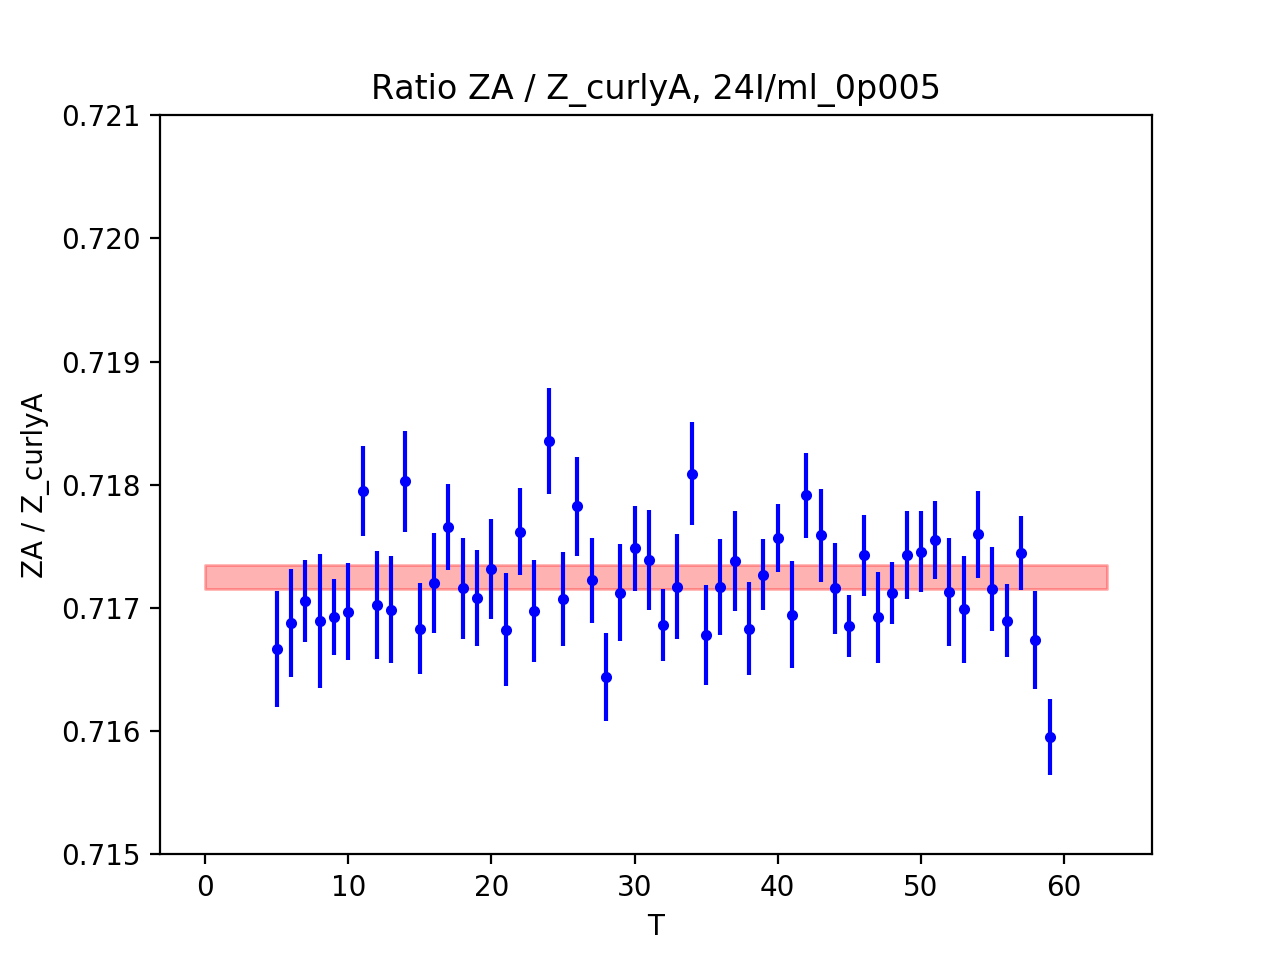

In [32]:
window_size = 0.001
Zwindow = range(Zratio_boot_mu.shape[0])
plt.figure()
plt.errorbar(Zwindow, Zratio_boot_mu, yerr = Zratio_boot_sigma, fmt = '.', c = 'b')
plt.fill_between(Zwindow, Zratio_mu - Zratio_sigma, Zratio_mu + Zratio_sigma, color = 'r', alpha = 0.3)
# plt.xlim((0, T // 2))
# plt.ylim((Zratio_mu - window_size, Zratio_mu + window_size))
plt.ylim((0.715, 0.721))
plt.title('Ratio ZA / Z_curlyA, ' + config)
plt.xlabel('T')
plt.ylabel('ZA / Z_curlyA')
plt.show()

## Old fitting code which chooses a fit range by hand

#### pion-00WW

In [34]:
meff_00WW_mu = np.mean(meff_00WW, axis = 0)
meff_00WW_sigma = np.std(meff_00WW, axis = 0, ddof = 1)

# fit_range = range(5, 20)
fit_range_00WW = range(15, 30)
# fit_range = range(10, 26)
ampi_00WW_boot, ampi_00WW_chi2, ampi_00WW_ndof = fit_constant(fit_range_00WW, meff_00WW)
ampi_00WW_chi2_ndof = ampi_00WW_chi2 / ampi_00WW_ndof
ampi_00WW_mu = np.mean(ampi_00WW_boot)
ampi_00WW_sigma = np.std(ampi_00WW_boot, ddof = 1)
print('a*m_pi for pion-00WW = ' + str(ampi_00WW_mu) + ' \pm ' + str(ampi_00WW_sigma))
print('chi^2 / ndof for this fit = ' + str(ampi_00WW_chi2_ndof))
# m_pi = 0.2412069567584312 \pm 0.00058483300634162

a*m_pi for pion-00WW = 0.19149784022790023 \pm 0.0005381931956746984
chi^2 / ndof for this fit = 2.1368756803477793


<IPython.core.display.Javascript object>


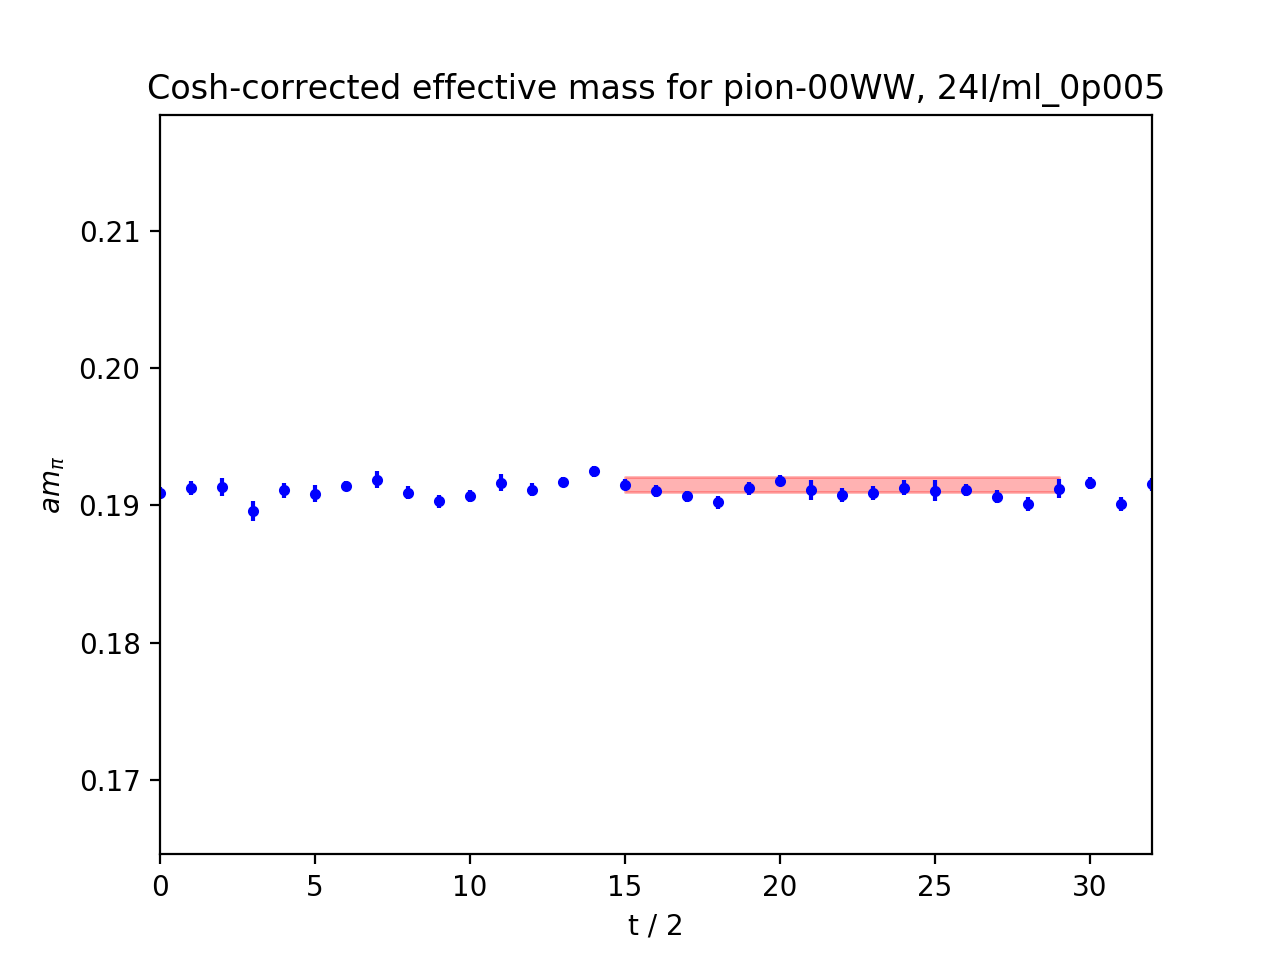

In [35]:
plt.figure()
plt.errorbar(range(meff_00WW_mu.shape[0]), meff_00WW_mu, yerr = meff_00WW_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_00WW, ampi_00WW_mu - ampi_00WW_sigma, ampi_00WW_mu + ampi_00WW_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
# plt.ylim((0.22, 0.28))
# plt.title('Cosh-corrected effective mass, pion-00WW, ' + config)
plt.ylim((ampi_00WW_mu - 50 * ampi_00WW_sigma, ampi_00WW_mu + 50 * ampi_00WW_sigma))
plt.title('Cosh-corrected effective mass for pion-00WW, ' + config)
plt.xlabel('t / 2')
plt.ylabel('$a m_{\\pi}$')
plt.show()

#### pion-00WP

In [37]:
# save fits to file and use that in chiral extrapolation
fit_range_mpi_00WP = range(15, 30)
ampi_00WP_boot, ampi_00WP_chi2, ampi_00WP_ndof = fit_constant(fit_range_mpi_00WP, meff_00WP)
ampi_00WP_chi2_ndof = ampi_00WP_chi2 / ampi_00WP_ndof
ampi_00WP_mu = np.mean(ampi_00WP_boot)
ampi_00WP_sigma = np.std(ampi_00WP_boot, ddof = 1)
print('a*m_pi for 00WP = ' + str(ampi_00WP_mu) + ' \pm ' + str(ampi_00WP_sigma))
print('chi^2 / ndof for 00WP = ' + str(ampi_00WP_chi2_ndof))

a*m_pi for 00WP = 0.1905624680498937 \pm 0.0001821153905824455
chi^2 / ndof for 00WP = 3.4767508302920693


<IPython.core.display.Javascript object>


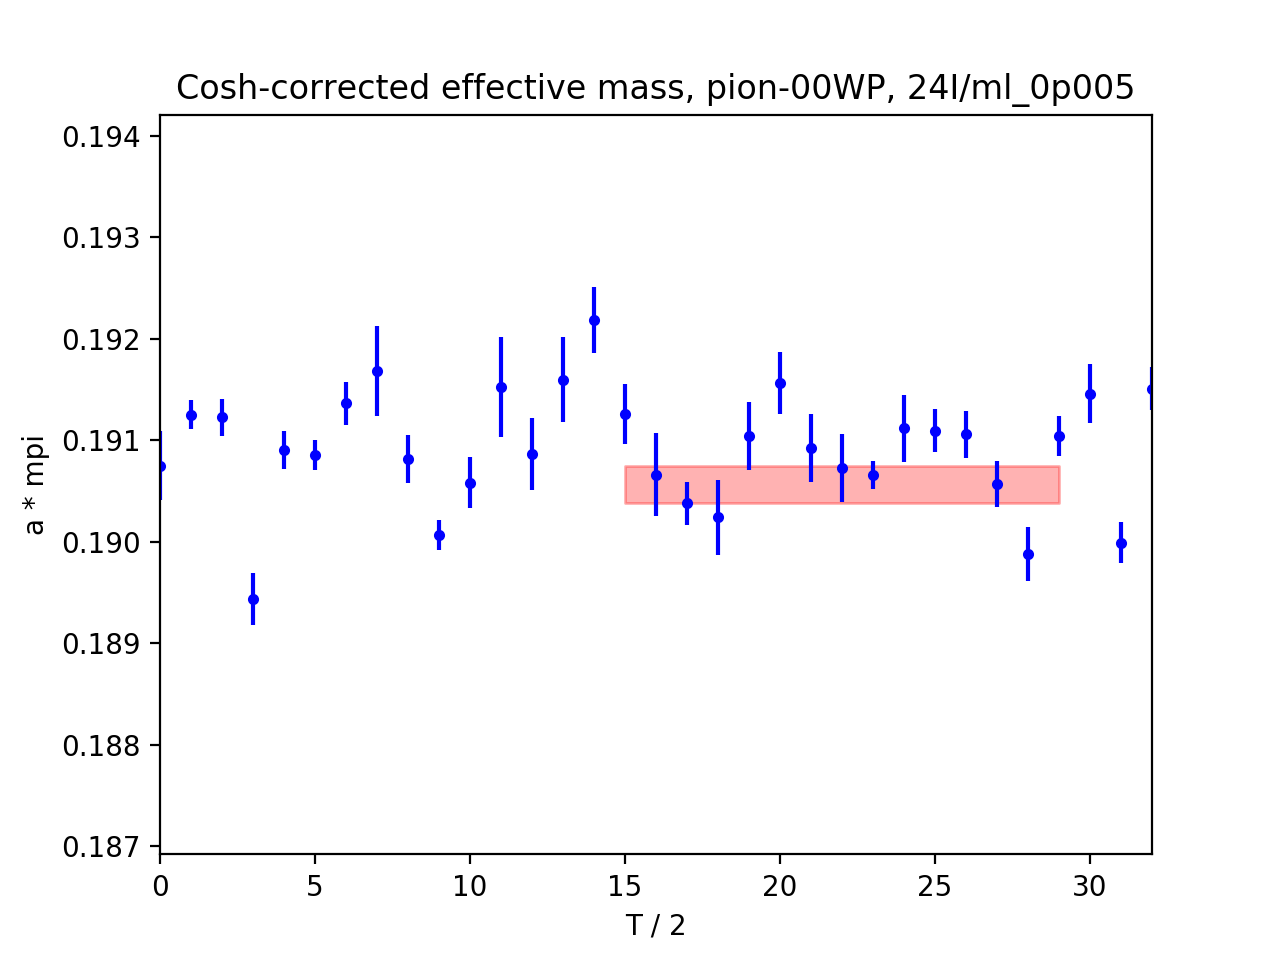

In [44]:
meff_00WP_mu = np.mean(meff_00WP, axis = 0)
meff_00WP_sigma = np.std(meff_00WP, axis = 0, ddof = 1)
plt.figure()
plt.errorbar(range(meff_00WW_mu.shape[0]), meff_00WP_mu, yerr = meff_00WP_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_mpi_00WP, ampi_00WP_mu - ampi_00WP_sigma, ampi_00WP_mu + ampi_00WP_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
# plt.ylim((0.23, 0.255))
plt.ylim((ampi_00WP_mu - 20 * ampi_00WP_sigma, ampi_00WP_mu + 20 * ampi_00WP_sigma))
plt.title('Cosh-corrected effective mass, pion-00WP, ' + config)
plt.xlabel('T / 2')
plt.ylabel('a * mpi')
plt.show()

# Compute pion decay constant with a few different methods

### (Method 1) Divide out time dependence and fit to a constant

In [45]:
# get overlap factor for the wall source. Divide out by the exponentials
time_dep_plus = np.zeros((n_boot, T), dtype = np.float64)
time_dep_minus = np.zeros((n_boot, T), dtype = np.float64)
for bidx in range(n_boot):
    for t in range(T):
        time_dep_plus[bidx, t] = np.exp(-ampi_00WW_boot[bidx] * t) + np.exp(-ampi_00WW_boot[bidx] * (T - t))
        time_dep_minus[bidx, t] = np.exp(-ampi_00WW_boot[bidx] * t) - np.exp(-ampi_00WW_boot[bidx] * (T - t))
# for the pion-pion correlators, use + and for the axial-pion correlator use -
pion00WW_overlap_sq_boot = np.real(C2_boot / time_dep_plus)
for bidx in range(n_boot):
    pion00WW_overlap_sq_boot[bidx,:] = pion00WW_overlap_sq_boot[bidx, :] * (2 * ampi_00WW_boot[bidx]) * (L ** 3)#*ainv_ensemble[bidx])
pion00WW_overlap_boot = np.sqrt(pion00WW_overlap_sq_boot)        # this should be N_pionOOWW
# pion00WW_overlap_boot = pion00WW_overlap_sq_boot        # this should be N_pionOOWW
pion00WW_overlap_mu = np.mean(pion00WW_overlap_boot, axis = 0)
pion00WW_overlap_sigma = np.std(pion00WW_overlap_boot, axis = 0, ddof = 1)

In [70]:
(N_pion00WW_mu ** 2) / (2 * ampi_00WW_mu * (L ** 3))


274766308.661344

In [46]:
# fit_range_pion00WW = range(15, 45)
fit_range_pion00WW = range(20, 40)
N_pion00WW, chi2_N_pion00WW, ndof_pion00WW = fit_constant(fit_range_pion00WW, pion00WW_overlap_boot)
chi2_ndof_N_pion00WW = chi2_N_pion00WW / ndof_pion00WW
N_pion00WW_mu = np.mean(N_pion00WW)
N_pion00WW_sigma = np.std(N_pion00WW, ddof = 1)
print('Overlap pion-00WW fit: N_P^WW = ' + np.format_float_scientific(N_pion00WW_mu) + '\pm ' \
      + np.format_float_scientific(N_pion00WW_sigma))
print('chi^2 / ndof for this fit: ' + str(chi2_ndof_N_pion00WW))
# N^2 / 2m = 2.229(19)e
# np.sqrt(N_pion00WW_mu * 2 * 432.2 * 32 / 4)    # this is about what |N| is? I'm just putting random numbers together

Overlap pion-00WW fit: N_P^WW = 1.2061339446691454e+06\pm 1.4510946132902107e+04
chi^2 / ndof for this fit: 0.0036309192952899056


In [ ]:
# np.sqrt((L ** 3) * N_pion00WW_mu * 2 * ampi_mu)

<IPython.core.display.Javascript object>


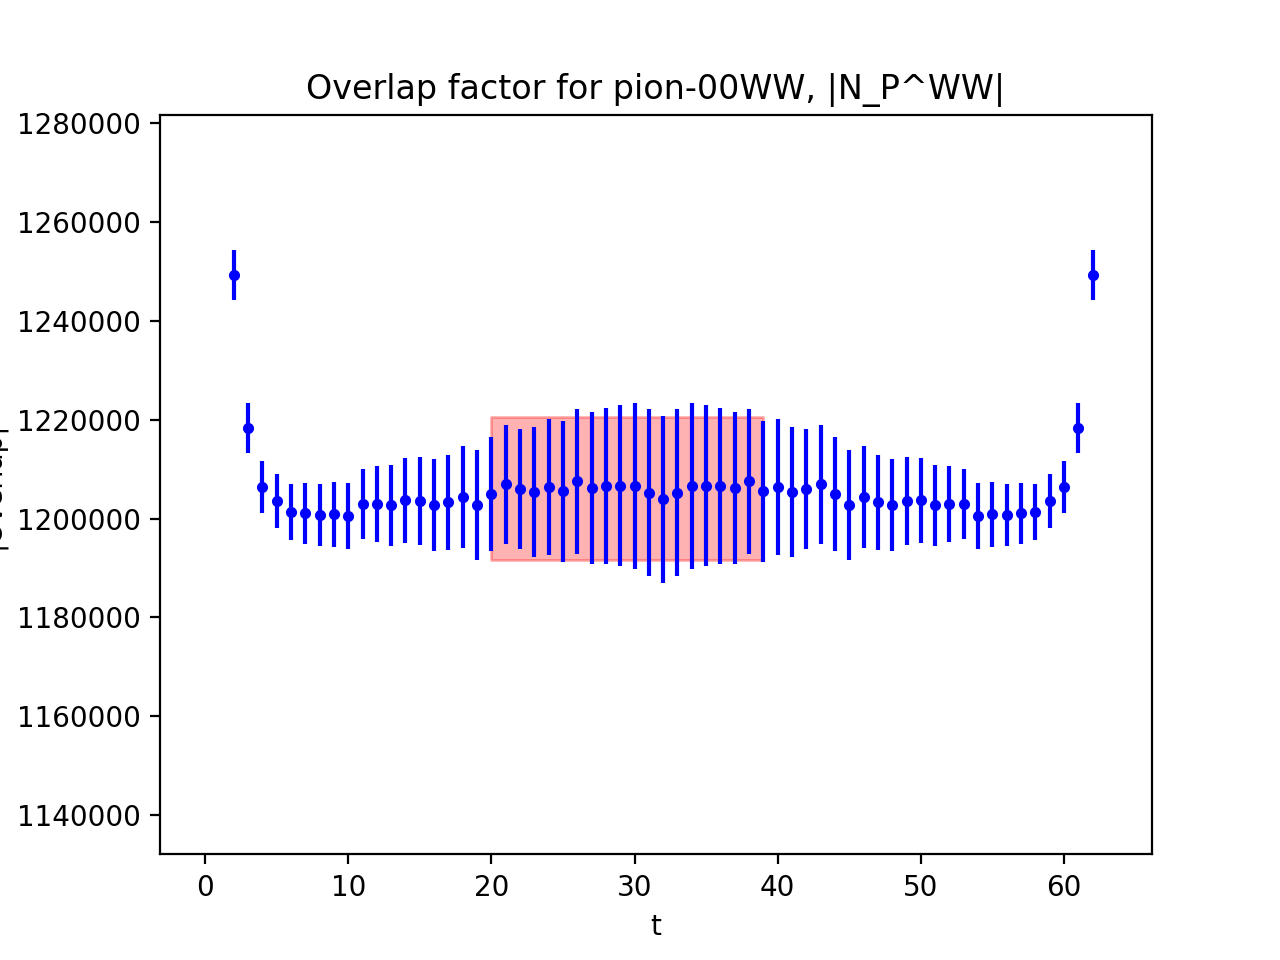

In [47]:
# Extract overlap
plt.figure()
plt.errorbar(range(T), pion00WW_overlap_mu, pion00WW_overlap_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_pion00WW, N_pion00WW_mu - N_pion00WW_sigma, N_pion00WW_mu \
                 + N_pion00WW_sigma, color = 'r', alpha = 0.3)
plt.title('Overlap factor for pion-00WW, |N_P^WW|')
# plt.title('Overlap factor for pion-00WW, N_P^2 / 2mpi')
plt.xlabel('t')
plt.ylabel('|Overlap|')
plt.ylim((0.95 * (N_pion00WW_mu - N_pion00WW_sigma), 1.05 * (N_pion00WW_mu + N_pion00WW_sigma)))
plt.show()

In [48]:
# 00WP overlap
pion00WP_overlap_sq_boot = np.real(C2_pion00WP / time_dep_plus)
for bidx in range(n_boot):
    pion00WP_overlap_sq_boot[bidx,:] = pion00WP_overlap_sq_boot[bidx, :] * (2 * ampi_00WW_boot[bidx]) * (L ** 3)
pion00WP_overlap_boot = np.sqrt(pion00WP_overlap_sq_boot)        # this should be N_pionOOWW
pion00WP_overlap_mu = np.mean(pion00WP_overlap_boot, axis = 0)
pion00WP_overlap_sigma = np.std(pion00WP_overlap_boot, axis = 0, ddof = 1)

In [49]:
fit_range_pion00WP = range(15, 45)
# fit_range_pion00WP = range(15, 30)
# fit_range_pion00WP = range(35, 50)
N_pion00WP, chi2_N_pion00WP, ndof_N_pion00WP = fit_constant(fit_range_pion00WP, pion00WP_overlap_boot)
chi2_ndof_N_pion00WP = chi2_N_pion00WP / ndof_N_pion00WP
N_pion00WP_mu = np.mean(N_pion00WP)
N_pion00WP_sigma = np.std(N_pion00WP, ddof = 1)
print('Overlap pion-00WP fit: ' + str(N_pion00WP_mu) + '\pm ' + str(N_pion00WP_sigma))
print('chi^2 / ndof for this fit: ' + str(chi2_ndof_N_pion00WP))

Overlap pion-00WP fit: 56597.72075032565\pm 563.7024077865666
chi^2 / ndof for this fit: 0.0324914154598164


<IPython.core.display.Javascript object>


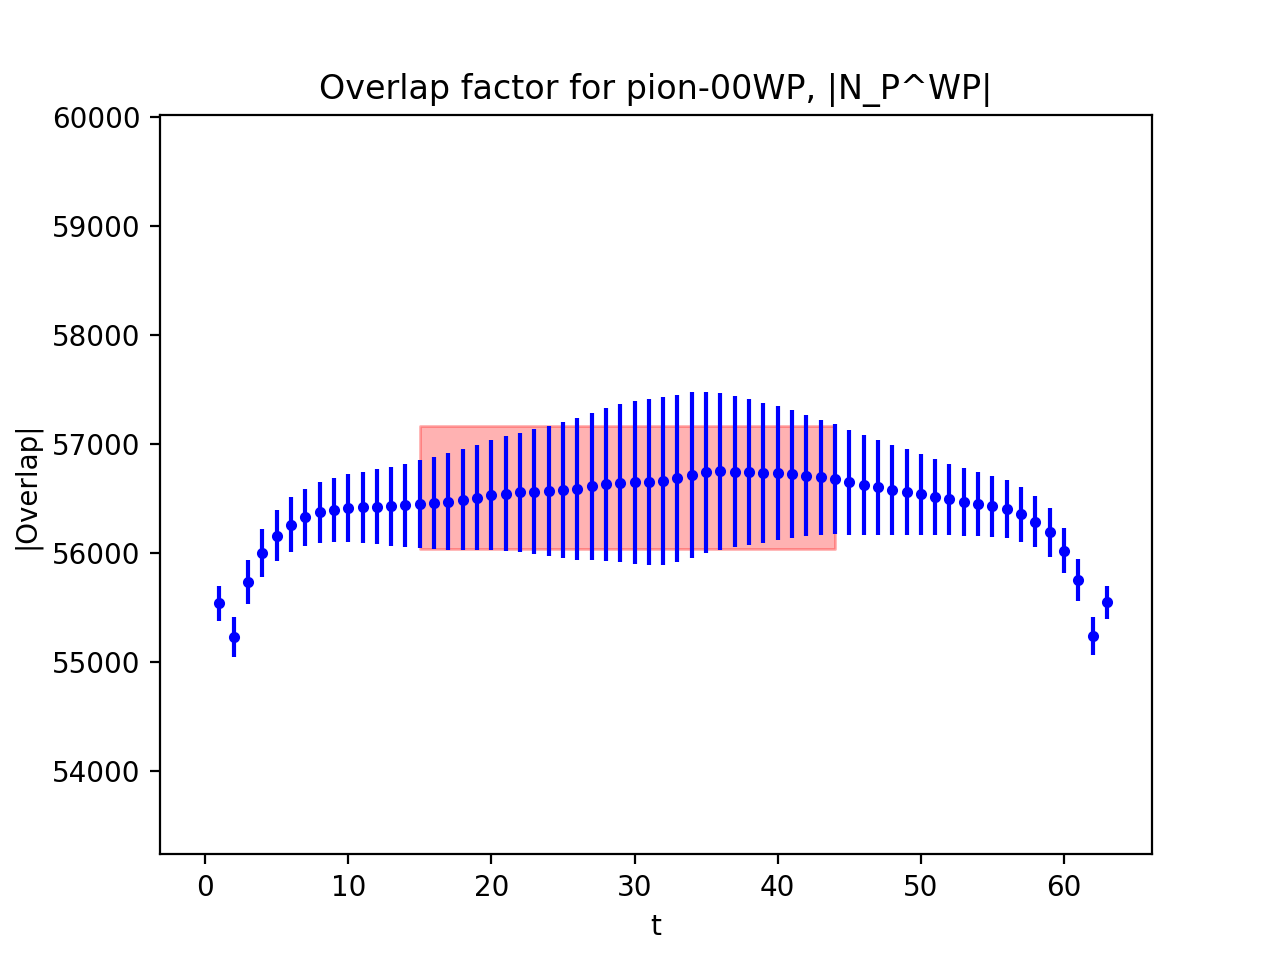

In [50]:
# Extract overlap
plt.figure()
plt.errorbar(range(T), pion00WP_overlap_mu, pion00WP_overlap_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_pion00WP, N_pion00WP_mu - N_pion00WP_sigma, N_pion00WP_mu + N_pion00WP_sigma, color = 'r', alpha = 0.3)
plt.title('Overlap factor for pion-00WP, |N_P^WP|')
plt.xlabel('t')
plt.ylabel('|Overlap|')
plt.ylim((0.95 * (N_pion00WP_mu - N_pion00WP_sigma), 1.05 * (N_pion00WP_mu + N_pion00WP_sigma)))
plt.show()

In [52]:
# fpOOWW: antisymmetric and time_dep_minus goes to 0 at T / 2
fp00WP_overlap_sq_boot = np.abs(C2_fpWP / time_dep_minus)
# TODO replace this with something that's actually correct-- FOLD AROUND MIDPOINT INSTEAD
fp00WP_overlap_sq_boot[np.isinf(fp00WP_overlap_sq_boot)] = 0
for bidx in range(n_boot):
    fp00WP_overlap_sq_boot[bidx,:] = fp00WP_overlap_sq_boot[bidx, :] * (2 * ampi_00WW_boot[bidx]) * (L ** 3)
# TODO: write out the equations for what overlap factor this is
# fp00WP_overlap_boot = np.sqrt(fp00WP_overlap_sq_boot)
# Since this is mixed axial-pseudoscalar, divide out by the pseudoscalar one
fp00WP_overlap_boot = np.abs(fp00WP_overlap_sq_boot) / np.abs(pion00WP_overlap_boot)
# fold over since it's antisymmetric
fp00WP_overlap_boot = np.real(fold(fp00WP_overlap_boot, T, sym = True))
fp00WP_overlap_mu = np.mean(fp00WP_overlap_boot, axis = 0)
fp00WP_overlap_sigma = np.std(fp00WP_overlap_boot, axis = 0, ddof = 1)

/Users/theoares/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [53]:
# fit_range_fp00WP = range(10, 30)
fit_range_fp00WP = range(15, 30)
N_fp00WP, chi2_N_fp00WP, ndof_N_fp00WP = fit_constant(fit_range_fp00WP, fp00WP_overlap_boot)
chi2_ndof_N_fp00WP = chi2_N_fp00WP / ndof_N_fp00WP
N_fp00WP_mu = np.mean(N_fp00WP)
N_fp00WP_sigma = np.std(N_fp00WP, ddof = 1)
print('Overlap fp00WP fit: ' + str(N_fp00WP_mu) + '\pm ' + str(N_fp00WP_sigma))
print('chi^2 / ndof for this fit: ' + str(chi2_ndof_N_fp00WP))

Overlap fp00WP fit: 6714.347954877258\pm 61.603425943063634
chi^2 / ndof for this fit: 0.0006134726287634201


<IPython.core.display.Javascript object>


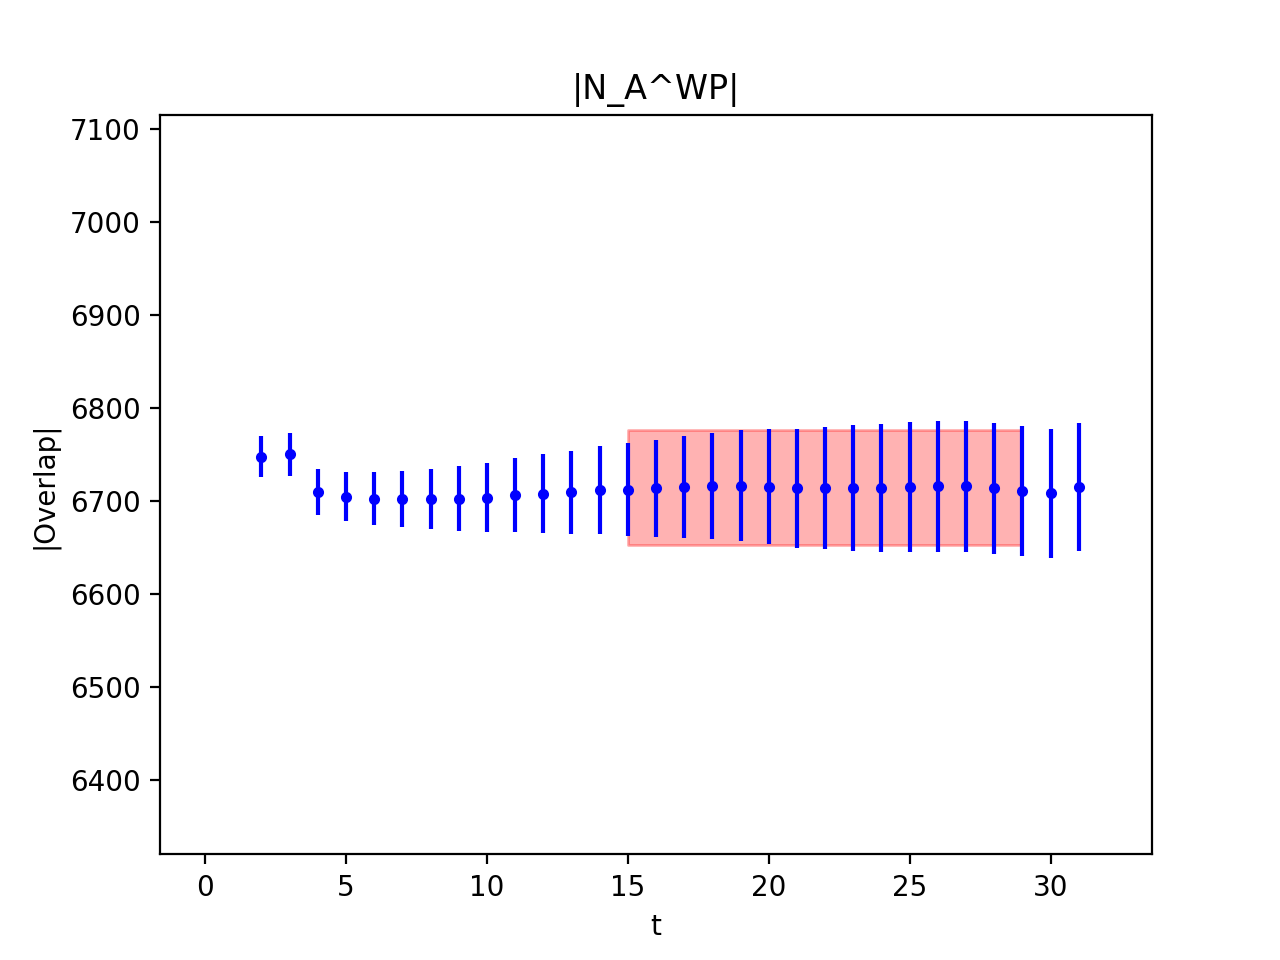

In [54]:
# Extract overlap. Note that we've artifically set the midpoint to 0 as there's a divide by 0 there
plt.figure()
plt.errorbar(range(T // 2 + 1), fp00WP_overlap_mu, fp00WP_overlap_sigma, fmt = '.', c = 'b')
# plt.errorbar(range(T), fp00WP_overlap_mu, fp00WP_overlap_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_fp00WP, N_fp00WP_mu - N_fp00WP_sigma, N_fp00WP_mu + N_fp00WP_sigma, color = 'r', alpha = 0.3)
plt.title('|N_A^WP|')
plt.xlabel('t')
plt.ylabel('|Overlap|')
plt.ylim((0.95 * (N_fp00WP_mu - N_fp00WP_sigma), 1.05 * (N_fp00WP_mu + N_fp00WP_sigma)))
plt.show()

In [55]:
# combine and get estimate for fpi
vol = L ** 3
afpi_boot = (1 / (ampi_00WW_boot * vol)) * np.abs(N_pion00WP) * np.abs(N_fp00WP) / np.abs(N_pion00WW)
afpi_mu = np.mean(afpi_boot)
afpi_sigma = np.std(afpi_boot, ddof = 1)
print('afpi bare = ' + str(afpi_mu) + ' \pm ' + str(afpi_sigma))

afpi bare = 0.11901703733793562 \pm 0.0006355916561872781


In [57]:
# Renormalize fpi
afpi_renorm_boot = Zratio_fits * afpi_boot
afpi_renorm_mu = np.mean(afpi_renorm_boot, axis = 0)
afpi_renorm_sigma = np.std(afpi_renorm_boot, axis = 0, ddof = 1)
print('afpi renorm = ' + str(afpi_renorm_mu) + ' \pm ' + str(afpi_renorm_sigma))

/Users/theoares/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: operands could not be broadcast together with shapes (1369,2) (50,) 

### (Method 2) VarPro with results from effective mass fit

In [ ]:
# fit C2_boot at each bootstrap by plugging in our fit result for mpi. Note that m = vector of length N_params
N_params = 1
f0 = lambda m, t : np.exp(-m[0] * t) + np.exp(-m[0] * (T - t))
f_fit = [f0]        # should be a vector of size N_params
A = lambda m : np.array([[f_fit[i](m, t) / C2_boot_sigma[t] for i in range(N_params)] for t in range(T)])
z = np.array([[C2_boot[bidx, t] / C2_boot_sigma[t] for t in range(T)] for bidx in range(n_boot)])
a_boot = np.zeros((n_boot), dtype = np.float64)
for bidx in range(n_boot):
    m_boot = np.array([ampi_00WW_boot[bidx]])    # guess for b
    Ab = A(m_boot)
    #a_boot[bidx] = np.sum(Ab * z[bidx]) / np.sum(Ab * Ab)
    a_boot[bidx] = ahat(Ab, z[bidx])
a_boot_mu = np.mean(a_boot)        # Should expect that a_boot = |N|^2 / 2m
a_boot_sigma = np.std(a_boot, ddof = 1)
print('Method 2, Overlap |N_W|^2 / 2m = ' + np.format_float_scientific(a_boot_mu) + ' \pm ' \
      + np.format_float_scientific(a_boot_sigma))
# 2.318(14) e8

In [ ]:
# 2.3189662580853543e+08 \pm 1.4320112779951137e+06

### (Method 3) VarPro

In [ ]:
# Minimize chi^2 for a(b) and get results for b parameter (which is mpi)
m_varpro = np.zeros((n_boot), dtype = np.float64)
m0 = np.array([ampi_00WW_mu], dtype = np.float64)
for bidx in range(n_boot):
    out = optimize.minimize(chi2_varpro, m0, args = (A, z[bidx]), method = 'Powell')
    m_varpro[bidx] = out['x']

In [ ]:
m_varpro_mu = np.mean(m_varpro)
m_varpro_sigma = np.std(m_varpro, ddof = 1)
print('mpi from varpro = ' + str(m_varpro_mu) + ' \pm ' + str(m_varpro_sigma))

In [ ]:
# get back overlap factor
varpro_overlap = np.array([ahat(A([m_varpro[bidx]]), z[bidx]) for bidx in range(n_boot)])
varpro_overlap_mu = np.mean(varpro_overlap)
varpro_overlap_sigma = np.std(varpro_overlap, ddof = 1)
print('Varpro overlap factor: |N|^2 / 2m = ' + np.format_float_scientific(varpro_overlap_mu) + ' \pm ' \
      + np.format_float_scientific(varpro_overlap_sigma))

# Save data for mpi, fpi, ZA

In [63]:
print('a*m_pi for pion-00WW = ' + str(ampi_00WW_mu) + ' \pm ' + str(ampi_00WW_sigma))
print('ZA / Z_curlyA = ' + str(Zratio_mu) + ' \pm ' + str(Zratio_sigma))
print('Overlap pion-00WW fit: N_P^WW = ' + np.format_float_scientific(N_pion00WW_mu) + '\pm ' \
      + np.format_float_scientific(N_pion00WW_sigma))
print('afpi bare = ' + str(afpi_mu) + ' \pm ' + str(afpi_sigma))b
# print('afpi renorm = ' + str(afpi_renorm_mu) + ' \pm ' + str(afpi_renorm_sigma))

a*m_pi for pion-00WW = 0.19149784022790023 \pm 0.0005381931956746984
ZA / Z_curlyA = 0.7172518895321911 \pm 0.00010007286428194152
Overlap pion-00WW fit: N_P^WW = 1.2061339446691454e+06\pm 1.4510946132902107e+04
afpi bare = 0.11901703733793562 \pm 0.0006355916561872781


In [ ]:
# fout_path = '/Users/theoares/Dropbox (MIT)/research/0nubb/short_distance/analysis_output/'+config+'/twopt_out.h5'
# fout = h5py.File(fout_path, 'w')
# fout['ampi'] = ampi_00WW_boot
# fout['afpi'] = afpi_renorm_boot
# fout['ZA_ratio'] = Zratio_boot
# fout.close()